In [1]:
#Create Anomalous examples, trial code to create anomalous examples, see create_anomalous.py for final version

In [6]:
import numpy
import helpers as helpers
import matplotlib.pyplot as plt


(466, 170, 360)
[[ 0.37777779  0.44444445  0.51111114  0.35555556]
 [ 0.44444445  0.48888889  0.33333334  0.33333334]
 [ 0.55555558  0.42222223  0.31111112  0.31111112]
 [ 0.37777779  0.40000001  0.2888889   0.35555556]]
(466, 170, 360)
[[ 1.88888896  2.22222233  2.55555582  1.77777779]
 [ 2.22222233  2.44444442  1.66666675  1.66666675]
 [ 2.77777791  2.11111116  1.55555558  1.55555558]
 [ 1.88888896  2.          1.44444454  1.77777779]]
(170, 360)


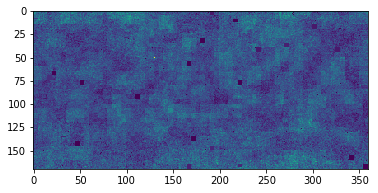

In [12]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276582.hdf5",data_type='good_2016')
print(data_sample.shape)

input_image=data_sample[0,:]
print(input_image[1:5,1:5])

#input_image[1,1:5]*=5
data_sample=data_sample*5
print(data_sample.shape)
input_image=data_sample[0,:]
print(input_image[1:5,1:5])

print(input_image.shape)

im=plt.imshow(input_image)
plt.show()
plt.clf()


In [ ]:
import random

height_range=range(0,input_image.shape[0],5)
width_range=range(0,input_image.shape[1],5)

y_cord=random.choice(height_range)#pick random y for a towers lower left point
x_cord=random.choice(width_range)#pick random x ---do---

for channel_y in range(y_cord,y_cord+5):
    for channel_x in range(x_cord,x_cord+5):
        input_image[channel_y,channel_x]*=1e5 #a very large number representing a hot tower

im2=plt.imshow(input_image)
plt.show()
    

In [ ]:
out_image=helpers.insert_hot_tower(input_image)
out_image=helpers.insert_hot_tower(out_image)

out_img=plt.imshow(out_image)
plt.show()

In [ ]:

height_range=range(0,input_image.shape[0],85)
width_range=range(0,input_image.shape[1],20)

y_cord=random.choice(height_range)#pick random y for a module lower left point
x_cord=random.choice(width_range)#pick random x -----do------

for channel_y in range(y_cord,y_cord+85):
    for channel_x in range(x_cord,x_cord+20):
        input_image[channel_y,channel_x]=0 #0 occupancy, module is off for some reason
im2=plt.imshow(input_image)
plt.show()

In [ ]:
data_sample=helpers.get_data("ECAL_rechit_occ_time_276528.hdf5",data_type='good')
print(data_sample.shape)
input_image=data_sample[0,:]
#print(input_image[0,:])
print(input_image.shape)

im=plt.imshow(input_image)
plt.show()
plt.clf()

In [ ]:
out_image=helpers.make_module_off(input_image)
#out_image=helpers.make_module_off(out_image)

out_img=plt.imshow(out_image)
plt.show()

In [ ]:
#trial creating anomalous set (see create_anomalous.py for the final code)

import h5py
import numpy as np
def clean_name(hist_name):
    return hist_name.replace('/','_').replace(' ','_')
run=276528
hist_list=['EBOccupancyTask/EBOT rec hit occupancy','EBTimingTask/EBTMT timing map','EEOccupancyTask/EEOT rec hit occupancy EE -',
'EETimingTask/EETMT timing map EE -','EEOccupancyTask/EEOT rec hit occupancy EE +','EETimingTask/EETMT timing map EE +']
X={}
for hist_name in hist_list:
    data_sample=helpers.get_data("ECAL_rechit_occ_time_"+str(run)+".hdf5",data_type='good',group=clean_name(hist_name))
    
    for lumisec in range(len(data_sample)):
        if lumisec%10!=0:continue
        input_image=data_sample[lumisec,:]
        out_sample=helpers.insert_hot_tower(input_image)

        out_sample=np.reshape(out_sample,(1,out_sample.shape[0],out_sample.shape[1]))
        
        if clean_name(hist_name) not in X.keys():
            X[clean_name(hist_name)]=out_sample
        else:       
            #print ('not creating but adding')
            X[clean_name(hist_name)] = np.concatenate((X[clean_name(hist_name)],out_sample))
        
h = h5py.File('../data_maxnorm/bad_2016/ECAL_rechit_occ_time_'+str(run)+'.hdf5','w')
#[h.create_dataset(name, data=data, compression='lzf') for (name, data) in X.iteritems()] # for Python2.x                                                  
[h.create_dataset(name, data=data, compression='lzf') for (name, data) in X.items()] # for Python3.x         
    
print(X['EBOccupancyTask_EBOT_rec_hit_occupancy'].shape)

In [7]:
anomalous_test_losses_artificial_hot_towers=[1718.310546875, 6476.7412109375, 805.92486572265625, 541.1263427734375, 2688.76953125, 6001.306640625, 3233.5712890625, 2339.105224609375, 2064.8115234375, 1451.6845703125, 2041.630126953125, 2223.3564453125, 1871.96533203125, 10188.869140625, 4334.6337890625, 2137.894287109375, 7332.78076171875, 1322.380126953125, 1876.483642578125, 3391.606201171875, 3990.86328125, 1039.7593994140625, 6483.552734375, 3109.080810546875, 1386.3258056640625, 6042.6865234375, 2484.00634765625, 3694.7529296875, 2788.321044921875, 3898.947509765625, 1390.65966796875, 6331.25, 2319.296142578125, 3024.4423828125, 297.5576171875, 3020.92138671875, 2922.36669921875, 8739.140625, 1757.132080078125, 963.46240234375, 708.271484375, 7660.36328125, 1780.6756591796875, 2897.39501953125, 4363.48388671875, 5736.70556640625, 2875.324951171875, 5451.8544921875, 8595.9208984375, 7346.89111328125, 5679.75439453125, 11542.16796875, 4288.232421875, 5152.5791015625, 1822.2783203125, 2525.48681640625, 987.070556640625, 2213.455810546875, 1255.9246826171875, 3027.182373046875, 1079.912353515625, 2252.841552734375, 4493.48681640625, 8442.875, 2668.595947265625, 0.00307114003226161, 1463.7237548828125, 4034.441650390625, 1458.1939697265625, 974.66961669921875, 622.45526123046875, 1865.674072265625, 1146.2288818359375, 682.0552978515625, 2058.38037109375, 764.3857421875, 1072.071044921875, 654.8958740234375, 720.03485107421875, 425.31805419921875, 943.719970703125, 342.35372924804688, 796.27593994140625, 730.0478515625, 246.81817626953125, 1170.212158203125, 536.8714599609375, 362.89474487304688, 736.648681640625, 639.58306884765625, 529.2901611328125, 399.44552612304688, 1177.6907958984375, 369.00381469726562, 724.01983642578125, 1168.2413330078125, 5961.0556640625, 6953.25341796875, 8127.2001953125, 1122.5604248046875, 4842.423828125, 3894.2177734375, 10052.9111328125, 3014.128173828125, 2532.233154296875, 3520.900146484375, 1681.649169921875, 2505.929443359375, 3546.47265625, 3983.3046875, 1597.6031494140625, 1660.5753173828125, 8410.87890625, 6188.8623046875, 459.1363525390625, 6689.904296875, 9314.02734375, 1015.42236328125, 2428.165283203125, 5629.32958984375, 854.17999267578125, 2247.394287109375, 2508.303466796875, 887.56939697265625, 2672.809814453125, 1652.8817138671875, 5910.29541015625, 3486.55078125, 4141.5087890625, 3399.033203125, 2757.747802734375, 2690.8125, 2479.4912109375, 6533.8076171875, 2395.89794921875, 3880.2939453125, 1982.7607421875, 5898.611328125, 1896.767822265625, 3983.8310546875, 2294.100830078125, 2755.802734375, 2473.1533203125, 3337.488525390625, 4761.23291015625, 4110.41748046875, 7851.509765625, 1849.201171875, 2884.376708984375, 1133.0640869140625, 2858.337890625, 3640.01416015625, 1981.3778076171875, 2904.29052734375, 3033.568359375, 5202.4541015625, 5388.83837890625, 10594.1640625, 8269.2861328125, 4138.44140625, 7598.5693359375, 2442.85400390625, 8717.072265625, 5324.41455078125, 6519.01611328125, 2579.67236328125, 4870.90869140625, 7124.4033203125, 3238.70654296875, 4888.158203125, 1638.2376708984375, 5338.54833984375, 5343.361328125, 2410.4736328125, 4095.827880859375, 1928.6016845703125, 2576.415771484375, 8330.171875, 0.005848064087331295, 3731.136962890625, 6817.87841796875, 4329.57373046875, 2528.414306640625, 4720.24951171875, 9030.9521484375, 3177.9462890625, 3463.83984375, 2679.619384765625, 4202.66015625, 3890.945556640625, 6952.1845703125, 3673.924072265625, 4867.50537109375, 1862.026611328125, 2301.161865234375, 3316.4873046875, 3705.566162109375, 5272.56005859375, 5569.22021484375, 8017.6240234375, 2404.611083984375, 8267.6357421875, 7980.18359375, 6213.1943359375, 6370.7265625, 1455.172607421875, 1954.5882568359375, 1664.4691162109375, 8013.32177734375, 2400.582275390625, 1109.221435546875, 2405.047607421875, 6132.546875, 913.4930419921875, 1507.1124267578125, 2611.466064453125, 0.0096151474863290787, 6164.33203125, 4259.51953125, 2207.3095703125, 7392.7939453125, 3992.758056640625, 3134.197998046875, 3279.504150390625, 1984.749755859375, 5397.59521484375, 1404.346923828125, 4204.5263671875, 2297.799560546875, 3940.35986328125, 2282.064208984375, 604.819580078125, 1380.692626953125, 2752.8359375, 5536.68896484375, 2333.603759765625, 4705.890625, 2961.818115234375, 748.4468994140625, 3308.90576171875, 1315.8865966796875, 5498.06689453125, 3806.008544921875, 2434.554931640625, 2763.1025390625, 2922.759033203125, 5464.97265625, 3390.369384765625, 5897.11572265625, 1620.5260009765625, 2982.18505859375, 2252.768798828125, 1331.6109619140625, 2434.8232421875, 5029.6435546875, 4860.99609375, 1106.8675537109375, 2124.4931640625, 2495.423828125, 6456.212890625, 1852.849609375, 4822.1240234375, 2882.007080078125, 1343.8074951171875, 795.3253173828125, 760.44818115234375, 2933.92626953125, 5820.19091796875, 5513.11767578125, 4291.08203125, 4561.12548828125, 2903.348388671875, 4231.77783203125, 8151.07421875, 0.0058900602161884308, 1951.599365234375, 1762.6500244140625, 1136.7991943359375, 2949.421142578125, 5676.2177734375, 4521.92724609375, 2094.544189453125, 2888.9052734375, 1226.119140625, 3434.377685546875, 3812.440673828125, 2218.96044921875, 933.74017333984375, 5506.1728515625, 3503.705322265625, 3018.974853515625, 3334.221435546875, 1792.23681640625, 1408.3260498046875, 2391.460693359375, 2428.71826171875, 1394.7164306640625, 1544.513916015625, 599.7554931640625, 2217.35302734375, 2415.2451171875, 2740.752685546875, 565.3668212890625, 4565.62060546875, 1694.9805908203125, 3915.367919921875, 5119.6357421875, 3600.03662109375, 2529.83642578125, 1704.498779296875, 6106.50390625, 1728.8623046875, 6468.60546875, 752.71502685546875, 1805.7626953125, 1728.5211181640625, 1515.81494140625, 575.7821044921875, 2436.304931640625, 2266.60888671875, 2188.049560546875, 1222.6756591796875, 2430.184326171875, 1699.9166259765625, 560.67547607421875, 5561.87646484375, 2800.821533203125, 2337.39404296875, 6033.82666015625, 2968.497314453125, 4232.63671875, 2170.421630859375, 6876.33154296875, 5257.24755859375, 2359.349609375, 1429.4014892578125, 13619.6552734375, 9084.9814453125, 1159.7911376953125, 4376.4111328125, 2203.697265625, 1183.4105224609375, 3760.106689453125, 13012.736328125, 399.42990112304688, 2456.619140625, 4031.80419921875, 4556.14892578125, 1266.023681640625, 1952.4810791015625, 3808.998291015625, 1626.65625, 5558.7236328125, 2223.50732421875, 4414.322265625, 2294.69140625, 1621.1187744140625, 5388.81201171875, 6489.42431640625, 5774.61376953125, 863.9739990234375, 7544.57470703125, 669.3564453125, 1883.1727294921875, 646.74188232421875, 1525.937255859375, 5913.94482421875, 4860.6015625, 724.90655517578125, 1266.1898193359375, 375.76516723632812, 1633.2838134765625, 1814.744873046875, 327.6683349609375, 4820.17822265625, 637.07220458984375, 702.1912841796875, 849.2830810546875, 1241.490478515625, 5549.36474609375, 4307.525390625, 4326.75927734375, 1270.3448486328125, 2619.78759765625, 1747.2275390625, 510.28073120117188, 1435.599853515625, 1712.9349365234375, 1134.3487548828125, 2764.99365234375, 128.84867858886719, 84.607856750488281, 105.51789855957031, 29.518388748168945, 71.252166748046875, 30.093448638916016, 81.917503356933594, 98.403556823730469, 103.83883666992188, 15.93607234954834, 236.12998962402344, 42.195533752441406, 88.420974731445312, 39.686332702636719, 49.078762054443359, 19.568349838256836, 144.0772705078125, 38.843185424804688, 182.1219482421875, 33.312984466552734, 37.147891998291016, 81.137336730957031, 130.30085754394531, 45.894233703613281, 110.55118560791016, 50.813224792480469, 1582.109619140625, 1851.001708984375, 675.27587890625, 1033.4625244140625, 1166.809814453125, 749.94390869140625, 1021.8046264648438, 580.35406494140625, 539.42352294921875, 791.13720703125, 566.30401611328125, 1085.4456787109375, 1402.1319580078125, 1193.694580078125, 1582.1690673828125, 5502.10888671875, 3582.558349609375, 7881.7001953125, 1906.6943359375, 7422.3662109375, 4725.6494140625, 4358.7958984375, 5685.77880859375, 8480.193359375, 5729.671875, 4874.5556640625, 4601.56103515625, 5912.38720703125, 11001.4755859375, 8099.66162109375, 4991.4931640625, 9742.166015625, 9928.994140625, 5864.673828125, 4560.4921875, 4955.32958984375, 3421.75830078125, 8641.837890625, 5680.5341796875, 8237.9267578125, 7330.4072265625, 5328.78125, 9909.51171875, 3796.65087890625, 11792.23828125, 5125.80517578125, 9902.8466796875, 8013.20361328125, 3569.748291015625, 11164.935546875, 4165.87109375, 5708.61865234375, 4344.00439453125, 5629.83642578125, 3125.125, 4854.6455078125, 8289.814453125, 5051.48779296875, 2787.405029296875, 1435.600341796875, 3565.028564453125, 12178.533203125, 7214.57861328125, 3208.6708984375, 2199.989013671875, 6079.29443359375, 5888.7119140625, 5562.4453125, 7655.0859375, 5123.34326171875, 8526.931640625, 2320.675048828125, 2128.16259765625, 4302.2412109375, 5975.90234375, 4125.5, 3650.640625, 4539.2314453125, 3207.670654296875, 1747.820556640625, 8710.8828125, 3619.702880859375, 2705.289794921875, 806.22467041015625, 3489.596923828125, 2366.70849609375, 379.650146484375, 2609.099365234375, 2838.53759765625, 2862.5146484375, 929.40570068359375, 1531.55419921875, 3619.9423828125, 3633.882568359375, 5691.34619140625, 3614.1630859375, 3489.116943359375, 0.0048716184683144093, 2475.52001953125, 1034.9403076171875, 1593.3160400390625, 2718.11474609375, 5453.01123046875, 1766.7811279296875, 2575.788818359375, 6893.2490234375, 981.07073974609375, 2159.79345703125, 1653.64501953125, 679.379638671875, 2311.997802734375, 1826.0032958984375, 2330.691162109375, 2088.34423828125, 3648.234619140625, 1717.1304931640625, 1476.965087890625, 2840.807373046875, 975.24981689453125, 2785.3740234375, 2559.544189453125, 7528.44677734375, 3790.60205078125, 3297.55126953125, 2831.57177734375, 3928.146484375, 2538.78564453125, 430.82745361328125, 3302.998779296875, 5966.99365234375, 2309.638671875, 11051.7373046875, 1570.823486328125, 659.91485595703125, 6684.71630859375, 0.01102149672806263, 7146.0966796875, 3325.79150390625, 2050.794921875, 3966.082275390625, 3485.424072265625, 2155.501953125, 2010.5843505859375, 6063.53759765625, 3038.233154296875, 3477.514404296875, 8118.3154296875, 8144.2724609375, 4107.416015625, 1181.6700439453125, 6341.00927734375, 2436.65087890625, 2406.91455078125, 3562.36865234375, 2680.284912109375, 4310.2626953125, 3263.125244140625, 4313.08642578125, 2292.12451171875, 3341.336669921875, 1986.7613525390625, 4623.79248046875, 3097.908447265625, 7107.615234375, 2009.066650390625, 1879.2529296875, 5328.01318359375, 3537.162353515625, 2525.401123046875, 6585.083984375, 2455.26123046875, 9528.7744140625, 1455.562255859375, 4350.7978515625, 7502.25830078125, 2755.118896484375, 2061.016357421875, 3323.116943359375, 2348.96533203125, 2341.397705078125, 3213.932861328125, 1900.3153076171875, 1614.28857421875, 3013.7744140625, 2619.240478515625, 1958.00634765625, 3441.121826171875, 3311.61328125, 3705.43505859375, 3211.60986328125, 7126.1982421875, 2971.918701171875, 1455.856689453125, 4022.0615234375, 1520.7891845703125, 4343.5126953125, 1484.61328125, 1934.3485107421875, 6676.72119140625, 3030.94091796875, 2782.5009765625, 2586.72021484375, 4572.66650390625, 2848.877685546875, 1171.0206298828125, 3955.55029296875, 1748.2735595703125, 1439.8282470703125, 2125.703125, 2603.295166015625, 1846.9287109375, 1760.115478515625, 1783.141845703125, 6810.80908203125, 3012.552734375, 1870.5203857421875, 924.96954345703125, 3458.090087890625, 3965.394775390625, 685.79766845703125, 720.85455322265625, 1146.3863525390625, 1250.90576171875, 2967.791259765625, 1643.9171142578125, 1804.8203125, 279.816650390625, 3779.0263671875, 2525.84765625, 2134.282470703125, 3380.43994140625, 2266.0625, 2498.512939453125, 3716.177978515625, 1137.765380859375, 1981.733642578125, 6846.64306640625, 2763.24951171875, 3232.328125, 1199.8387451171875, 5956.1513671875, 2004.948974609375, 1597.308349609375, 5085.802734375, 2369.868408203125, 5696.82861328125, 3574.265625, 4280.9189453125, 4133.5556640625, 2576.437255859375, 3152.529541015625, 2324.142822265625, 7775.080078125, 4602.193359375, 3471.5859375, 4720.44384765625, 1497.2060546875, 7187.80859375, 2658.868896484375, 3006.96728515625, 6687.0205078125, 1291.635986328125, 2028.319091796875, 1083.989013671875, 1657.7205810546875, 5366.69189453125, 3191.248779296875, 4874.3046875, 1115.351318359375, 2777.09228515625, 861.88494873046875, 302.41824340820312, 1076.5821533203125, 2874.593017578125, 554.015625, 1817.1722412109375, 1956.7525634765625, 2694.07275390625, 758.25042724609375, 2803.883056640625, 2046.90625, 4274.4619140625, 852.95343017578125, 1027.9432373046875, 2566.732421875, 697.3319091796875, 522.5484619140625, 137.44827270507812, 379.50167846679688, 429.21780395507812, 146.84884643554688, 143.56350708007812, 752.35101318359375, 140.81491088867188, 457.27700805664062, 1261.786376953125, 303.37481689453125, 471.76031494140625, 309.15554809570312, 677.0086669921875, 207.67877197265625, 1159.9732666015625, 171.81573486328125, 376.07427978515625, 381.61911010742188, 153.81297302246094, 815.6986083984375, 571.22857666015625, 865.83489990234375, 760.00616455078125, 1059.544921875, 260.76248168945312, 511.221923828125, 358.2894287109375, 164.38479614257812, 518.06689453125, 117.14053344726562, 178.42333984375, 407.31451416015625, 702.41729736328125, 306.01678466796875, 217.29093933105469, 467.06314086914062, 1839.71728515625, 906.40130615234375, 1221.821044921875, 867.5361328125, 1278.514892578125, 1453.592041015625, 531.1365966796875, 1337.824951171875, 858.7938232421875, 806.995849609375, 822.7423095703125, 986.20330810546875, 599.66888427734375, 449.5341796875, 1065.53125, 941.110107421875, 998.00921630859375, 1757.8577880859375, 5101.294921875, 4624.95703125, 5054.32666015625, 4281.61767578125, 7376.64453125, 18127.0625, 9636.5390625, 6370.63623046875, 6729.22705078125, 7793.02001953125, 3189.5146484375, 3484.5986328125, 2772.0732421875, 7244.814453125, 8487.443359375, 4253.03271484375, 2113.630859375, 6126.38916015625, 6775.25048828125, 5466.80322265625, 1255.9583740234375, 881.32452392578125, 3498.5595703125, 6953.20068359375, 6620.365234375, 3806.144287109375, 3406.674072265625, 5306.5625, 2079.389404296875, 4591.69287109375, 2275.45361328125, 3078.7080078125, 4011.423583984375, 2684.40283203125, 4855.18603515625, 1920.2784423828125, 2677.123291015625, 7199.5302734375, 7405.14111328125, 2989.74951171875, 6171.16162109375, 12008.693359375, 1806.4736328125, 2450.16455078125, 2969.100830078125, 7979.11962890625, 3698.702392578125, 3510.846435546875, 1749.734130859375, 5455.17236328125, 1785.0830078125, 3284.79345703125, 8112.84619140625, 1860.8052978515625, 4008.9111328125, 4230.88818359375, 1758.625732421875, 2863.804443359375, 3492.716064453125, 3911.784912109375, 8296.685546875, 4562.4208984375, 3265.561279296875, 2853.09814453125, 7950.26708984375, 1804.706298828125, 2061.372314453125, 3552.304931640625, 6924.50830078125, 1910.4224853515625, 6996.31494140625, 3093.220458984375, 798.62353515625, 5252.759765625, 1814.71826171875, 2389.3291015625, 3546.465087890625, 1954.250244140625, 11240.453125, 1913.3106689453125, 1583.2939453125, 4753.142578125, 2473.5712890625, 5443.37451171875, 7179.56982421875, 2595.11962890625, 3037.712646484375, 3118.081298828125, 9110.3583984375, 7923.82470703125, 5086.76123046875, 5972.37451171875, 1751.705322265625, 1107.76416015625, 1216.51611328125, 2422.88525390625, 5545.66650390625, 1833.033935546875, 1365.591552734375, 709.327880859375, 802.1796875, 3647.5361328125, 2550.638671875, 3623.060546875, 1873.2523193359375, 1810.767822265625, 2641.883056640625, 582.19842529296875, 2548.227783203125, 5923.7861328125, 714.622314453125, 8253.8876953125, 2800.491455078125, 4804.49658203125, 4392.20849609375, 6258.9873046875, 633.27276611328125, 4370.75439453125, 2710.144287109375, 5947.7646484375, 4160.150390625, 3195.979248046875, 6836.32421875, 4270.16650390625, 4482.75341796875, 3189.56787109375, 2073.8984375, 6868.580078125, 7071.4208984375, 11442.0087890625, 2267.9609375, 3441.277587890625, 4275.9765625, 3210.171630859375, 1701.1053466796875, 2454.907958984375, 2434.050048828125, 2004.528076171875, 3361.590087890625, 3155.32177734375, 5974.7109375, 3553.44970703125, 1133.614013671875, 3905.898193359375, 0.01293116994202137, 3788.189697265625, 3528.046630859375, 3440.266845703125, 2819.1806640625, 4992.6318359375, 2495.566650390625, 2987.935546875, 5352.62109375, 8079.56787109375, 2353.45703125, 7323.56103515625, 6005.28857421875, 7161.01611328125, 2778.7880859375, 2513.40380859375, 3106.910400390625, 4763.9599609375, 2279.040283203125, 3743.0283203125, 8970.2568359375, 6152.01806640625, 1092.388671875, 2592.44677734375, 5903.2265625, 6621.37353515625, 3102.354736328125, 6455.2802734375, 2961.064208984375, 1835.8399658203125, 12677.9375, 5313.431640625, 4819.2861328125, 1861.6527099609375, 3227.27587890625, 2826.82470703125, 2607.80126953125, 1997.845703125, 534.501220703125, 4806.28369140625, 4390.36767578125, 2760.31103515625, 2714.36181640625, 3881.3994140625, 1022.215576171875, 1439.3155517578125, 2458.3896484375, 2312.154296875, 1928.0003662109375, 3676.92626953125, 1807.7816162109375, 3509.82470703125, 1690.7877197265625, 2125.407958984375, 3295.255859375, 3291.405517578125, 1423.6065673828125, 1320.3187255859375, 2058.0732421875, 2767.798828125, 861.480224609375, 3053.2197265625, 4053.23974609375, 8554.8515625, 2050.884765625, 3303.145751953125, 1173.3404541015625, 1429.4005126953125, 1862.64501953125, 2621.65234375, 2265.72802734375, 2433.26318359375, 2167.0439453125, 2252.794921875, 2973.10888671875, 3344.71044921875, 3423.146484375, 2816.39208984375, 1368.5740966796875, 975.56365966796875, 2806.005615234375, 609.200439453125, 8085.19140625, 2049.044921875, 2242.5986328125, 2892.06494140625, 2925.224609375, 2794.814697265625, 3039.165771484375, 2414.257568359375, 3138.6630859375, 5016.6923828125, 2841.243408203125, 5332.37841796875, 2533.91259765625, 4192.0224609375, 3546.966552734375, 5482.333984375, 2725.3330078125, 6609.24853515625, 1406.681640625, 3393.515869140625, 1591.7034912109375, 5982.263671875, 1279.072265625, 3490.884521484375, 1827.15087890625, 2525.108154296875, 3328.635009765625, 4448.7939453125, 3681.4619140625, 4054.356689453125, 1394.6416015625, 2466.528564453125, 1506.9605712890625, 1493.35498046875, 2199.66455078125, 1163.2191162109375, 1361.4376220703125, 1262.997314453125, 2303.05908203125, 1099.177734375, 1272.7158203125, 572.3665771484375, 1838.58056640625, 2023.0087890625, 3396.95751953125, 2768.347900390625, 2194.554443359375, 3606.1484375, 4285.7099609375, 4809.87646484375, 1587.904541015625, 1325.943115234375, 629.04443359375, 5161.4990234375, 1749.479248046875, 3394.186279296875, 3052.251953125, 4629.52197265625, 1791.8477783203125, 956.97845458984375, 12893.0458984375, 5859.37939453125, 1686.7606201171875, 1233.5853271484375, 4886.06591796875, 3813.057861328125, 1028.5347900390625, 2915.204833984375, 982.2952880859375, 3434.152587890625, 2943.72607421875, 4637.01123046875, 7899.0029296875, 6791.36767578125, 3462.09619140625, 956.883544921875, 2707.795166015625, 6518.66064453125, 4038.1796875, 3307.165283203125, 2767.9228515625, 1389.399658203125, 2500.75927734375, 3164.90283203125, 3892.068359375, 3280.722412109375, 2057.263671875, 3210.78125, 2547.75927734375, 1720.0382080078125, 3344.037109375, 2457.771484375, 1003.2024536132812, 7373.66650390625, 1700.51513671875, 2200.0166015625, 3048.2578125, 1433.357421875, 1281.79736328125, 1745.4970703125, 2225.625244140625, 1695.25634765625, 1031.8212890625, 3101.805419921875, 1025.5006103515625, 1755.3486328125, 1025.0146484375, 1403.0804443359375, 1022.1473388671875, 5637.6318359375, 4112.228515625, 7649.71826171875, 8468.12109375, 19295.142578125, 3360.555908203125, 9740.552734375, 1412.7080078125, 2204.802978515625, 7215.53857421875, 7653.900390625, 5076.42431640625, 2456.356689453125, 3823.539306640625, 4149.63671875, 1822.376953125, 3119.440185546875, 4627.90869140625, 4597.14306640625, 7147.62744140625, 5611.78271484375, 4158.0986328125, 1769.550537109375, 4725.13134765625, 7046.580078125, 4081.853515625, 2506.474609375, 11205.83984375, 4249.1513671875, 6494.73388671875, 4285.3544921875, 2832.01904296875, 7755.732421875, 3815.73095703125, 1267.518798828125, 7590.11181640625, 2734.526611328125, 4786.171875, 2605.670654296875, 6693.494140625, 3356.249755859375, 4549.6669921875, 4382.52685546875, 1772.5858154296875, 2759.880615234375, 4105.17236328125, 2601.884033203125, 6044.1142578125, 1432.0526123046875, 6197.78759765625, 428.44540405273438, 4552.09814453125, 1417.5015869140625, 1872.925537109375, 1904.3955078125, 4833.41943359375, 2465.871337890625, 1722.5875244140625, 2192.8017578125, 5834.32568359375, 5618.89501953125, 2685.592041015625, 7908.78857421875, 2109.46826171875, 2297.2783203125, 5820.7919921875, 4189.93896484375, 2040.6014404296875, 4543.95556640625, 6169.59521484375, 11815.4931640625, 6451.67578125, 4280.22998046875, 2498.668701171875, 2231.687744140625, 5105.70947265625, 2823.969970703125, 4463.29541015625, 4482.42724609375, 5223.359375, 5040.80078125, 2696.16845703125, 2790.82373046875, 1443.8380126953125, 3660.58740234375, 2237.27392578125, 1299.1715087890625, 4425.6162109375, 5505.49609375, 1553.3704833984375, 4402.35302734375, 5011.22509765625, 1776.8353271484375, 3960.440673828125, 4896.17236328125, 1913.8680419921875, 6756.13330078125, 3980.51025390625, 7069.90673828125, 2387.58447265625, 3852.152099609375, 7620.87353515625, 1184.9537353515625, 2511.68603515625, 2657.245849609375, 3182.203369140625, 2969.0068359375, 976.72412109375, 2563.36376953125, 3105.349365234375, 1347.142822265625, 2477.28271484375, 4924.8955078125, 2800.38427734375, 855.840087890625, 10077.9443359375, 7150.32958984375, 3769.929443359375, 3172.771240234375, 1995.365478515625, 3468.79052734375, 3223.06640625, 1048.4300537109375, 8549.0986328125, 1652.4173583984375, 0.0045299222692847252, 2653.0595703125, 6457.244140625, 1001.60546875, 5061.853515625, 2914.580322265625, 4981.40234375, 1175.6949462890625, 1659.473876953125, 2255.927490234375, 3803.550537109375, 2983.84326171875, 1668.8896484375, 4445.7607421875, 2594.65673828125, 2174.9755859375, 3601.193359375, 5960.96875, 2203.45556640625, 4629.337890625, 5744.595703125, 4456.07177734375, 7460.21337890625, 4334.93603515625, 2572.5771484375, 2629.813232421875, 7535.30615234375, 3921.950439453125, 5670.32763671875, 4727.7109375, 2130.09033203125, 5470.2216796875, 4677.1357421875, 2946.148193359375, 10641.6005859375, 6403.9501953125, 3550.980224609375, 1521.928466796875, 4017.8330078125, 107.38451385498047, 5320.431640625, 15701.3955078125, 7173.3779296875, 5602.32080078125, 2389.5224609375, 3405.9189453125, 4768.5390625, 4633.78662109375, 3398.514892578125, 5327.2099609375, 3555.23046875, 7123.48583984375, 533.4080810546875, 2494.349609375, 3680.251708984375, 4302.7998046875, 8042.99609375, 3149.468017578125, 6445.732421875, 3524.244873046875, 4538.607421875, 6038.80029296875, 6475.4736328125, 6451.44970703125, 6802.4794921875, 5023.30517578125, 6491.46337890625, 3178.025634765625, 6884.36328125, 7624.94580078125, 2217.01904296875, 6634.7041015625, 5050.3046875, 3409.271484375, 2819.212890625, 1949.4840087890625, 1183.910888671875, 1692.5648193359375, 0.0069410456344485283, 5386.72119140625, 2518.779052734375, 1699.0152587890625, 2810.27099609375, 5279.8681640625, 3184.67236328125, 3332.846435546875, 3014.587158203125, 3243.120361328125, 2969.27587890625, 7058.1640625, 2130.516357421875, 3512.87548828125, 9521.0244140625, 4395.0009765625, 2257.98291015625, 11708.435546875, 2290.384033203125, 4192.958984375, 2450.0048828125, 1382.677001953125, 3814.991455078125, 2894.32177734375, 8563.7861328125, 3107.605712890625, 6199.6630859375, 1473.3135986328125, 781.2724609375, 6775.5205078125, 1824.3218994140625, 1777.7279052734375, 1405.1815185546875, 2427.399169921875, 2494.802001953125, 2766.39208984375, 538.98388671875, 5067.05126953125, 1552.2232666015625, 1513.0535888671875, 1376.5123291015625, 890.89105224609375, 1722.302490234375, 7513.50927734375, 3065.55419921875, 985.3837890625, 1238.95751953125, 1944.3912353515625, 2665.312744140625, 1975.7890625, 5045.693359375, 1633.107666015625, 3307.1064453125, 2472.9140625, 2720.758544921875, 2544.065185546875, 2723.5390625, 1453.4918212890625, 595.88238525390625, 2452.28173828125, 1765.1278076171875, 3892.469482421875, 1016.1417236328125, 5344.42333984375, 4100.79248046875, 4337.208984375, 1324.5164794921875, 2681.98095703125, 3806.843017578125, 2585.55908203125, 1175.6947021484375, 1539.7027587890625, 649.9407958984375, 2266.611572265625, 2472.203857421875, 896.27777099609375, 1743.918701171875, 2459.629150390625, 830.51763916015625, 5504.9990234375, 4227.81884765625, 4980.62451171875, 1895.8294677734375, 1758.552734375, 3058.363525390625, 2307.646240234375, 5134.72216796875, 2718.041015625, 1783.3182373046875, 1652.5037841796875, 4420.84814453125, 5686.8369140625, 4260.697265625, 2190.90478515625, 8497.60546875, 1364.059814453125, 2262.6337890625, 1373.1605224609375, 3650.99560546875, 1843.695068359375, 5094.7109375, 4827.998046875, 4927.35302734375, 1459.08203125, 2085.60888671875, 1669.537109375, 1116.57373046875, 2219.41943359375, 2178.329833984375, 848.2808837890625, 2113.564697265625, 1328.87841796875, 4028.17724609375, 3414.112548828125, 2132.3408203125, 3113.333984375, 1676.9544677734375, 2174.11865234375, 3713.0869140625, 4138.87939453125, 3065.626220703125, 1585.100830078125, 2207.414306640625, 1746.4359130859375, 1566.9820556640625, 1574.943359375, 3532.626708984375, 2521.415771484375, 1202.234130859375, 3051.023193359375, 1412.13134765625, 491.3895263671875, 1244.195556640625, 1261.3145751953125, 3470.703125, 1575.55615234375, 2375.339599609375, 2590.63818359375, 780.10699462890625, 691.5115966796875, 1410.048828125, 1323.1748046875, 1746.466796875, 1913.1802978515625, 1827.5091552734375, 2834.945068359375, 7028.16015625, 1404.776123046875, 516.74481201171875, 2092.03955078125, 1919.124755859375, 5014.65966796875, 915.3563232421875, 2864.24560546875, 1489.2744140625, 3471.355224609375, 2091.14892578125, 967.5316162109375, 349.10470581054688, 2215.331298828125, 2283.388427734375, 2653.554931640625, 1376.527099609375, 613.07135009765625, 786.13336181640625, 1280.4613037109375, 2442.647216796875, 1092.4892578125, 3436.751953125, 1512.238037109375, 1777.02783203125, 2445.203857421875, 1185.123291015625, 648.6070556640625, 2216.345947265625, 11734.8173828125, 1622.1854248046875, 374.234130859375, 1241.6724853515625, 699.38323974609375, 1088.7286376953125, 1997.3211669921875, 2744.225341796875, 662.8046875, 2837.48779296875, 3265.563720703125, 2270.2109375, 1860.25830078125, 567.56915283203125, 545.90570068359375, 1902.7156982421875, 2254.20556640625, 3224.223876953125, 3051.702392578125, 1717.0787353515625, 1407.3382568359375, 2818.811279296875, 2469.90771484375, 1510.9212646484375, 1432.2589111328125, 1242.469970703125, 1124.2698974609375, 1041.949462890625, 2998.54736328125, 1819.6419677734375, 2336.154296875, 5635.630859375, 2754.920166015625, 3280.921142578125, 4716.14111328125, 1766.392822265625, 2624.798583984375, 6065.3955078125, 1271.5892333984375, 2038.234130859375, 3680.433837890625, 1576.3424072265625, 871.97845458984375, 5354.66845703125, 1466.986083984375, 790.3319091796875, 2852.4482421875, 3200.0888671875, 2161.166015625, 3432.20458984375, 2254.568603515625, 1336.72607421875, 1406.4630126953125, 4310.24853515625, 2398.85791015625, 4728.44091796875, 4653.95556640625, 3141.974853515625, 1603.491943359375, 943.22332763671875, 3162.10888671875, 1938.6109619140625, 6103.462890625, 1682.69482421875, 7807.91015625, 4664.8359375, 1524.669921875, 2493.295654296875, 1856.247802734375, 1925.6334228515625, 3315.578369140625, 503.46237182617188, 836.5343017578125, 615.93988037109375, 423.27288818359375, 3817.990234375, 1766.777587890625, 5445.111328125, 1398.583251953125, 2651.152587890625, 1295.6864013671875, 747.36077880859375, 1021.9327392578125, 2107.82080078125, 545.7666015625, 1787.979736328125, 776.71026611328125, 1213.6510009765625, 1803.566162109375, 828.68603515625, 1880.1624755859375, 1555.7774658203125, 367.28228759765625, 653.01678466796875, 2115.040283203125, 870.11981201171875, 4068.32763671875, 1652.630615234375, 1730.22314453125, 679.3289794921875, 156.20191955566406, 829.2423095703125, 1786.5411376953125, 828.81768798828125, 1129.0777587890625, 0.0036818305961787701, 2916.964111328125, 508.01947021484375, 2324.3056640625, 2982.317138671875, 1557.2371826171875, 623.59716796875, 842.4814453125, 219.38894653320312, 1734.7249755859375, 1051.0068359375, 2009.6158447265625, 1141.3690185546875, 833.75433349609375, 929.810546875, 748.0174560546875, 1502.4327392578125, 3288.751708984375, 432.88626098632812, 8039.0029296875, 570.7283935546875, 3557.023193359375, 994.10943603515625, 1234.340576171875, 5012.37646484375, 533.107666015625, 5075.1796875, 705.06427001953125, 615.6658935546875, 1292.0748291015625, 2634.193359375, 548.1322021484375, 1771.123779296875, 1020.8033447265625, 964.27288818359375, 6542.88623046875, 503.27484130859375, 1141.45654296875, 2008.3594970703125, 576.40045166015625, 2785.695068359375, 1353.3707275390625, 2315.06396484375, 1110.6959228515625, 997.49359130859375, 1054.8355712890625, 1933.2745361328125, 1339.423095703125, 3159.600830078125, 2188.58740234375, 2635.831787109375, 4940.63427734375, 9073.7373046875, 3385.03369140625, 11662.0078125, 4050.866943359375, 3559.08447265625, 4593.875, 2412.37646484375, 1328.379638671875, 643.13226318359375, 3156.163330078125, 990.9232177734375, 5822.9951171875, 4285.96435546875, 3258.43505859375, 1495.7506103515625, 170.91712951660156, 354.87115478515625, 608.86407470703125, 240.36341857910156, 344.45974731445312, 284.4879150390625, 306.84979248046875, 684.19964599609375, 0.001421980676241219, 468.96133422851562, 1420.2926025390625, 654.65826416015625, 518.69073486328125, 334.028564453125, 278.88766479492188, 406.05172729492188, 854.7103271484375, 682.11456298828125, 377.99310302734375, 1428.143310546875, 1007.9600219726562, 612.49090576171875, 512.99456787109375, 176.79411315917969, 985.0482177734375, 1061.834716796875, 2004.968994140625, 987.31744384765625, 888.14447021484375, 231.94140625, 413.05844116210938, 862.54779052734375, 1031.8072509765625, 757.47247314453125, 624.40399169921875, 1266.9156494140625, 624.961669921875, 770.04217529296875, 1027.7457275390625, 620.4559326171875, 823.31561279296875, 302.06680297851562, 671.93621826171875, 277.03683471679688, 395.29562377929688, 938.1256103515625, 367.356689453125, 526.80706787109375, 1221.9525146484375, 1032.2000732421875, 299.45693969726562, 535.71124267578125, 273.37289428710938, 193.82316589355469, 1091.877685546875, 1203.329833984375, 627.4041748046875, 694.53668212890625, 259.94320678710938, 143.22364807128906, 714.023193359375, 748.86773681640625, 2322.132568359375, 453.904296875, 333.58343505859375, 4809.529296875, 10768.2060546875, 2774.85498046875, 3394.962646484375, 4995.998046875, 8327.1279296875, 6269.5234375, 4652.83544921875, 5954.50830078125, 2607.19482421875, 2676.67236328125, 2672.642822265625, 3325.15771484375, 3228.01513671875, 3461.389404296875, 8822.404296875, 8509.0244140625, 3108.379638671875, 1737.27392578125, 3032.4140625, 3118.796142578125, 1476.5244140625, 7727.95263671875, 1791.4173583984375, 2166.622802734375, 13309.8115234375, 6783.22265625, 3324.968017578125, 4854.3251953125, 5537.19287109375, 3878.59326171875, 5092.6201171875, 2558.75341796875, 4664.919921875, 3744.96875, 3333.22265625, 3664.177490234375, 7676.55224609375, 4404.1552734375, 4079.350341796875, 2386.12353515625, 5018.39111328125, 10652.888671875, 2180.94482421875, 5714.47119140625, 2260.201904296875, 6172.611328125, 2078.4716796875, 1803.7694091796875, 5001.25537109375, 5065.94921875, 2195.25146484375, 6766.73486328125, 2330.12353515625, 3678.13623046875, 3045.4287109375, 12691.521484375, 5493.40771484375, 8689.0966796875, 2553.327880859375, 8496.341796875, 3933.824462890625, 7647.470703125, 4219.48193359375, 2200.6689453125, 1704.16015625, 6318.62353515625, 2647.623291015625, 3711.146728515625, 3952.42236328125, 2978.202880859375, 3968.603515625, 4407.27685546875, 2875.11767578125, 790.1319580078125, 3242.88671875, 2853.709716796875, 8962.880859375, 3465.98974609375, 5029.91845703125, 5735.40380859375, 5591.65234375, 3656.96435546875, 10319.5693359375, 7154.51123046875, 8842.9248046875, 4253.63427734375, 0.005130549892783165, 4422.25, 8921.33984375, 8740.4697265625, 6771.77197265625, 3973.931884765625, 5662.6591796875, 6951.5224609375, 3793.402099609375, 3852.87939453125, 7888.39111328125, 4795.4619140625, 3526.847412109375, 9373.810546875, 5910.71630859375, 4257.16650390625, 3072.027099609375, 9516.984375, 6123.64208984375, 6749.25146484375, 5992.13232421875, 5127.17236328125, 3152.62890625, 8214.349609375, 6316.2333984375, 4532.58984375, 2930.70263671875, 9216.1748046875, 5798.64013671875, 2849.5439453125, 3563.226806640625, 1389.638916015625, 3093.05810546875, 7408.1494140625, 3534.549560546875, 1846.4552001953125, 1115.449951171875, 2519.133544921875, 2508.38232421875, 2744.718994140625, 2545.150634765625, 2468.893310546875, 5242.4501953125, 1123.5400390625, 3897.822998046875, 3674.318359375, 5094.03369140625, 1437.90673828125, 939.68572998046875, 2809.768310546875, 2316.18408203125, 3012.08935546875, 2618.751708984375, 975.01226806640625, 2847.10009765625, 5441.0732421875, 3585.134765625, 2146.367919921875, 1619.41357421875, 3915.169921875, 1603.02880859375, 3183.705810546875, 3807.90234375, 3429.05029296875, 8498.65625, 1935.6826171875, 6978.55712890625, 2919.457275390625, 4077.60302734375, 458.59210205078125, 263.6881103515625, 701.4971923828125, 2830.704833984375, 4109.4111328125, 7746.5341796875, 2390.99169921875, 6506.35888671875, 3859.017822265625, 3527.556884765625, 1654.3797607421875, 6201.62060546875, 3801.26171875, 2257.9267578125, 9122.9921875, 4383.17822265625, 4078.849609375, 3403.849609375, 3770.636962890625, 2986.436279296875, 1146.2183837890625, 1603.99072265625, 4890.19677734375, 7231.15576171875, 3557.64208984375, 3173.8271484375, 1388.7320556640625, 4419.0908203125, 5243.36181640625, 6186.67919921875, 4173.9306640625, 3586.734130859375, 4748.001953125, 6025.4033203125, 10543.59765625, 1772.3226318359375, 3020.5546875, 1839.9720458984375, 3632.22412109375, 3021.88134765625, 3235.33740234375, 5432.267578125, 4321.69873046875, 3415.496826171875, 3841.861328125, 2749.22412109375, 8548.2509765625, 1398.3975830078125, 4143.20556640625, 2399.72509765625, 3216.28466796875, 1742.1048583984375, 4885.76123046875, 1457.3974609375, 3394.196533203125, 3970.385986328125, 2788.2177734375, 3502.337158203125, 543.53350830078125, 6213.95458984375, 2506.560302734375, 2920.79443359375, 2219.0498046875, 5125.05322265625, 2468.89013671875, 4808.08837890625, 2752.442138671875, 1940.6771240234375, 4227.58935546875, 4865.09521484375, 4657.90185546875, 2373.2626953125, 4013.30712890625, 2631.7744140625, 811.72528076171875, 774.61663818359375, 1368.3809814453125, 4464.75927734375, 2669.511962890625, 460.38717651367188, 825.28277587890625, 709.1685791015625, 283.37741088867188, 3601.8603515625, 1789.0059814453125, 3237.4755859375, 6008.95458984375, 860.08349609375, 362.496337890625, 984.75592041015625, 503.89544677734375, 2723.2509765625, 1205.9468994140625, 1845.384765625, 1675.26513671875, 679.82708740234375, 1714.434814453125, 1178.213623046875, 1329.9805908203125, 1696.7049560546875, 898.10870361328125, 1261.70654296875, 2726.282958984375, 3379.424072265625, 1543.8251953125, 2007.040771484375, 826.57373046875, 1437.0416259765625, 1192.1546630859375, 1978.9136962890625, 2157.51220703125, 3730.38232421875, 930.82354736328125, 3837.163330078125, 1539.376220703125, 1154.8687744140625, 2146.528564453125, 4576.19384765625, 1301.2596435546875, 1422.7978515625, 2324.37939453125, 3098.83740234375, 2606.314208984375, 3179.26708984375, 7322.310546875, 2367.321533203125, 1039.263671875, 2204.44482421875, 11413.1357421875, 2431.370361328125, 6774.48095703125, 1481.493896484375, 5275.72998046875, 747.46038818359375, 4330.1767578125, 1627.546142578125, 4039.277099609375, 3507.96240234375, 4485.615234375, 6078.53466796875, 6507.97509765625, 1748.444091796875, 2026.37939453125, 3971.494873046875, 2080.8095703125, 1097.926513671875, 1536.67822265625, 3627.2236328125, 3945.831787109375, 2723.56494140625, 4913.82177734375, 2153.371337890625, 3102.190673828125, 2155.53369140625, 1797.1666259765625, 2834.55029296875, 1590.5855712890625, 1771.9476318359375, 2024.6573486328125, 3588.264892578125, 1320.3260498046875, 4887.833984375, 2720.629150390625, 3970.966796875]

In [8]:
anomalous_test_losses_artificial_missing_modules=[0.0097041605040431023, 0.0093740280717611313, 0.0076055284589529037, 0.0058829630725085735, 0.0063782208599150181, 0.010549603961408138, 0.0101600531488657, 0.0093936892226338387, 0.0067351800389587879, 0.008539196103811264, 0.0091754738241434097, 0.0091276681050658226, 0.008517085574567318, 0.0075931809842586517, 0.0092287510633468628, 0.0087571898475289345, 0.0077957725152373314, 0.0065380018204450607, 0.0071690082550048828, 0.0086685512214899063, 0.010292804799973965, 0.010110585950314999, 0.0083207478746771812, 0.0084009421989321709, 0.0092975832521915436, 0.0081167956814169884, 0.008282332681119442, 0.0034846118651330471, 0.005330235231667757, 0.0014129973715171218, 0.0010868890676647425, 0.00076778489165008068, 0.0013279956765472889, 0.0010956996120512486, 0.001033412292599678, 0.00084312137914821506, 0.00095720042008906603, 0.0010209451429545879, 0.0012905378825962543, 0.00092822738224640489, 0.0015919072320684791, 0.0058749639429152012, 0.0064609991386532784, 0.0075789671391248703, 0.0056789885275065899, 0.0059151300229132175, 0.0059509864076972008, 0.003641749732196331, 0.0041616996750235558, 0.0044756988063454628, 0.0063538569957017899, 0.0061262664385139942, 0.0070059113204479218, 0.0049937451258301735, 0.006760675460100174, 0.0027075354009866714, 0.0041419346816837788, 0.0042153424583375454, 0.0042853890918195248, 0.0044498438946902752, 0.0057596843689680099, 0.0038970473688095808, 0.0043949512764811516, 0.0038059342186897993, 0.0051776254549622536, 0.003001997247338295, 0.0071020405739545822, 0.0069999122060835361, 0.0040843547321856022, 0.0035440714564174414, 0.0036374805495142937, 0.0069674523547291756, 0.0044508413411676884, 0.0057359845377504826, 0.0034484788775444031, 0.0058686528354883194, 0.0043840422295033932, 0.0042997137643396854, 0.0063758157193660736, 0.0055953380651772022, 0.0031860817689448595, 0.0022768708877265453, 0.0059954551979899406, 0.0044871610589325428, 0.005577347707003355, 0.0046051214449107647, 0.0041579660028219223, 0.0037561182398349047, 0.0031484595965594053, 0.0095377778634428978, 0.0038772290572524071, 0.002103166189044714, 0.0092242388054728508, 0.0034977004397660494, 0.0071085439994931221, 0.0049416990950703621, 0.0032721844036132097, 0.0033767069689929485, 0.0032773758284747601, 0.0073756380006670952, 0.003650209866464138, 0.0052063856273889542, 0.0063093523494899273, 0.0040270015597343445, 0.0043777935206890106, 0.0030402129050344229, 0.0053486195392906666, 0.0042712828144431114, 0.0028566569089889526, 0.0024001509882509708, 0.0040096854791045189, 0.002660827711224556, 0.0034829331561923027, 0.0025727155152708292, 0.0031658262014389038, 0.0048654624260962009, 0.0058372104540467262, 0.0043600890785455704, 0.0031762341968715191, 0.0033033448271453381, 0.0058962986804544926, 0.0038426355458796024, 0.0023002412635833025, 0.0037562621291726828, 0.0039900727570056915, 0.0040147770196199417, 0.0068050879053771496, 0.0048181610181927681, 0.0028469886165112257, 0.004499493632465601, 0.0037035034038126469, 0.0037863256875425577, 0.0058549763634800911, 0.002968957182019949, 0.0027704024687409401, 0.0028202349785715342, 0.0034295052755624056, 0.0026719861198216677, 0.010416016913950443, 0.0085287801921367645, 0.0095210000872612, 0.0092579936608672142, 0.0078075514174997807, 0.0088662318885326385, 0.011168341152369976, 0.010905584320425987, 0.0073652463033795357, 0.0091949068009853363, 0.0089362990111112595, 0.0093905674293637276, 0.0053746821358799934, 0.0082732671871781349, 0.0082845715805888176, 0.010355593636631966, 0.0081635350361466408, 0.0036732153967022896, 0.0096158599480986595, 0.0065325461328029633, 0.0090052541345357895, 0.0067666023969650269, 0.0073486999608576298, 0.0042589250952005386, 0.0093052620068192482, 0.0082609551027417183, 0.00020439083164092153, 0.00020488354493863881, 0.00021139017189852893, 0.00022454764985013753, 0.00020750745898112655, 0.0002546898031141609, 0.00018565736536402255, 0.00019883427012246102, 0.00021111397654749453, 0.00022347772028297186, 0.00019291207718197256, 0.0022153961472213268, 0.0012918465072289109, 0.0013314608950167894, 0.0012245200341567397, 0.0010229096515104175, 0.0010680321138352156, 0.00077710405457764864, 0.0061377966776490211, 0.0061442987062036991, 0.0065407394431531429, 0.0066619841381907463, 0.0060294633731245995, 0.0064953682012856007, 0.0063474602065980434, 0.0074277776293456554, 0.0054659871384501457, 0.0063173426315188408, 0.0069381194189190865, 0.0055052260868251324, 0.0043887454085052013, 0.0065635647624731064, 0.0064661037176847458, 0.0038601497653871775, 0.0042548477649688721, 0.007567254826426506, 0.0053170481696724892, 0.0065575689077377319, 0.0057676061987876892, 0.00477226497605443, 0.0040121283382177353, 0.0038167696911841631, 0.0063428906723856926, 0.0046985805965960026, 0.0070619592443108559, 0.0081010852009057999, 0.0053511094301939011, 0.005170394666492939, 0.0023174723610281944, 0.00605368847027421, 0.0020304222125560045, 0.0041723959147930145, 0.0033852816559374332, 0.0041354801505804062, 0.0049586021341383457, 0.0045905648730695248, 0.0063037294894456863, 0.0027759755030274391, 0.0079979188740253448, 0.0047532296739518642, 0.0027425459120422602, 0.003856379073113203, 0.0031646001152694225, 0.003737312275916338, 0.0048727178946137428, 0.0047160577960312366, 0.002531309612095356, 0.0032746135257184505, 0.0055445223115384579, 0.0033750259317457676, 0.004340542946010828, 0.0040077744051814079, 0.0045058405958116055, 0.0032000483479350805, 0.003923795185983181, 0.003342929994687438, 0.0022432422265410423, 0.0051996153779327869, 0.0044664507731795311, 0.0044338558800518513, 0.0034172977320849895, 0.0032550876494497061, 0.0050877444446086884, 0.0037511158734560013, 0.0038797557353973389, 0.003701468463987112, 0.0025117062032222748, 0.0026598148979246616, 0.0026630666106939316, 0.0030468550976365805, 0.0062150484882295132, 0.0036074924282729626, 0.0018789999885484576, 0.0032979848328977823, 0.0043779644183814526, 0.0035804356448352337, 0.002737229922786355, 0.0032525630667805672, 0.0038483114913105965, 0.0046430975198745728, 0.0052060731686651707, 0.0035417969338595867, 0.0035708262585103512, 0.0022997430060058832, 0.004245417658239603, 0.0046219616197049618, 0.0026808648835867643, 0.0028869279194623232, 0.0024184661451727152, 0.0093508344143629074, 0.0054234582930803299, 0.0089170327410101891, 0.0077624144032597542, 0.0089943846687674522, 0.0096875056624412537, 0.0085091292858123779, 0.0065720067359507084, 0.003917221911251545, 0.0031612212769687176, 0.0048622540198266506, 0.0020487953443080187, 0.0026844942476600409, 0.0037189922295510769, 0.0021150992251932621, 0.0017468458972871304, 0.0023939327802509069, 0.0020992702338844538, 0.0027008345350623131, 0.0017291849944740534, 0.0022523552179336548, 0.00084289954975247383, 0.00086429668590426445, 0.0011177603155374527, 0.0013502882793545723, 0.0010981644736602902, 0.00070703058736398816, 0.0012913235696032643, 0.00089107535313814878, 0.00089811504585668445, 0.00086745200678706169, 0.00091354205505922437, 0.0010323623428121209, 0.00066842895466834307, 0.00088010670151561499, 0.00094046490266919136, 0.0012030951911583543, 0.0010708033805713058, 0.0013805211056023836, 0.00088822189718484879, 0.0012268871068954468, 0.00088028534082695842, 0.00099566869903355837, 0.0070123020559549332, 0.0043936315923929214, 0.006647131871432066, 0.0059531601145863533, 0.0068846116773784161, 0.0052734734490513802, 0.0051655084826052189, 0.0085284644737839699, 0.0032802913337945938, 0.0081978514790534973, 0.0056179817765951157, 0.0048800925724208355, 0.00537857785820961, 0.0059270318597555161, 0.0047328947111964226, 0.006398654542863369, 0.0055578267201781273, 0.0079646427184343338, 0.0038701205048710108, 0.0063093136996030807, 0.005770205520093441, 0.0058404724113643169, 0.0041150730103254318, 0.0079205557703971863, 0.0057333009317517281, 0.0026114073116332293, 0.0069636059924960136, 0.0087809916585683823, 0.0062773572281002998, 0.0065283537842333317, 0.0033831694163382053, 0.0042457543313503265, 0.0028337752446532249, 0.0047096088528633118, 0.0067178779281675816, 0.0074059893377125263, 0.0060186735354363918, 0.0037200571969151497, 0.004274505190551281, 0.0037444694899022579, 0.0078380713239312172, 0.0061426940374076366, 0.0046997414901852608, 0.0035456772893667221, 0.0031052771955728531, 0.0039957617409527302, 0.0043025752529501915, 0.0041768662631511688, 0.003611117135733366, 0.0035768900997936726, 0.0070256469771265984, 0.0024979263544082642, 0.004352849442511797, 0.0046770898625254631, 0.0023577380925416946, 0.0038785943761467934, 0.0029574963264167309, 0.0033882143907248974, 0.0057598231360316277, 0.0036411839537322521, 0.0036905840970575809, 0.0039429585449397564, 0.0044266781769692898, 0.0062249107286334038, 0.0053757205605506897, 0.0031263711862266064, 0.0031785035971552134, 0.0050218775868415833, 0.0040859333239495754, 0.0042157210409641266, 0.0056140292435884476, 0.005372973158955574, 0.004856436513364315, 0.006244465708732605, 0.0032248289790004492, 0.0038157955277711153, 0.0040888525545597076, 0.0040813162922859192, 0.002623293548822403, 0.0036649040412157774, 0.0038164136931300163, 0.0067332591861486435, 0.0023160467389971018, 0.0020649058278650045, 0.0035450798459351063, 0.0050053508020937443, 0.0043022381141781807, 0.0052188625559210777, 0.0031433207914233208, 0.003273907583206892, 0.003140830434858799, 0.0041897767223417759, 0.0031271146144717932, 0.0031799748539924622, 0.0038866573013365269, 0.004891097079962492, 0.00523355882614851, 0.0044495104812085629, 0.0031438453588634729, 0.0048861568793654442, 0.0019393488764762878, 0.0028014152776449919, 0.0042165340855717659, 0.0037358975969254971, 0.0027939158026129007, 0.0042800121009349823, 0.0034227664582431316, 0.003394984407350421, 0.0025579843204468489, 0.0033273862209171057, 0.0026649197097867727, 0.0023245576303452253, 0.008576556108891964, 0.0060391966253519058, 0.0083496114239096642, 0.0082765147089958191, 0.0068360422737896442, 0.011296871118247509, 0.0082166763022542, 0.0030610174871981144, 0.0046540484763681889, 0.0036707771942019463, 0.0047601000405848026, 0.0056976024061441422, 0.0035978504456579685, 0.0054298564791679382, 0.0041963397525250912, 0.0045691435225307941, 0.002840906847268343, 0.0047217528335750103, 0.003915875218808651, 0.0051432540640234947, 0.0021209768019616604, 0.0016430789837613702, 0.0021805032156407833, 0.0013911140849813819, 0.0016235150396823883, 0.0012401000130921602, 0.00087764346972107887, 0.004950355738401413, 0.0051993820816278458, 0.0036890814080834389, 0.0066744750365614891, 0.0052180066704750061, 0.0032282178290188313, 0.0057115321978926659, 0.0069119525142014027, 0.0068141552619636059, 0.0058798291720449924, 0.0036779085639864206, 0.0071859061717987061, 0.0044242790900170803, 0.0078428396955132484, 0.0063206441700458527, 0.007564169354736805, 0.0023541469126939774, 0.0087482258677482605, 0.0080966483801603317, 0.0069699976593255997, 0.006273594219237566, 0.0053738974966108799, 0.0055512469261884689, 0.0038698832504451275, 0.0046045640483498573, 0.0049754874780774117, 0.0027772122994065285, 0.0047085192054510117, 0.0038130595348775387, 0.0068346764892339706, 0.0045228269882500172, 0.0055848704650998116, 0.0042616985738277435, 0.0060758050531148911, 0.00539823854342103, 0.0039169816300272942, 0.0026547298766672611, 0.0046571865677833557, 0.0046111131086945534, 0.0048917527310550213, 0.0036842813715338707, 0.004745956975966692, 0.0038544991984963417, 0.0040847109630703926, 0.0064394380897283554, 0.0043396148830652237, 0.0041448157280683517, 0.0068831699900329113, 0.0027631316334009171, 0.004913821816444397, 0.0045231464318931103, 0.0045189345255494118, 0.0039645368233323097, 0.0051981774158775806, 0.0065837581641972065, 0.0034571303986012936, 0.0064789727330207825, 0.0046576433815062046, 0.0037691136822104454, 0.0045499540865421295, 0.0073669785633683205, 0.0041611515916883945, 0.0074025583453476429, 0.0035235874820500612, 0.0063410033471882343, 0.0071095121093094349, 0.0049245059490203857, 0.0045036566443741322, 0.0032384621445089579, 0.0052209645509719849, 0.0066733825951814651, 0.0044325231574475765, 0.0029421737417578697, 0.0038603849243372679, 0.0056989663280546665, 0.0066354307346045971, 0.0046911709941923618, 0.0042289560660719872, 0.0045480616390705109, 0.0052803289145231247, 0.0047230301424860954, 0.0032697420101612806, 0.0027524044271558523, 0.0033848928287625313, 0.003327537328004837, 0.0031130865681916475, 0.0044352998957037926, 0.0048716808669269085, 0.0034119430929422379, 0.0025710954796522856, 0.0042227483354508877, 0.0062592364847660065, 0.0026045844424515963, 0.004704733844846487, 0.0040173353627324104, 0.0045838155783712864, 0.0038829233963042498, 0.0032136794179677963, 0.0032427387777715921, 0.0033333101309835911, 0.0046705193817615509, 0.0043237567879259586, 0.0029086035210639238, 0.0061670448631048203, 0.0021966355852782726, 0.0071318107657134533, 0.002869773656129837, 0.0039189751259982586, 0.0025121669750660658, 0.0041925814002752304, 0.0032051769085228443, 0.0048183519393205643, 0.0038519927766174078, 0.0045919837430119514, 0.0065336734987795353, 0.0063060545362532139, 0.0029561147093772888, 0.0041322158649563789, 0.0062969708815217018, 0.0024845064617693424, 0.0042551648803055286, 0.0049975775182247162, 0.0052043148316442966, 0.003349407110363245, 0.0033060675486922264, 0.0033530434593558311, 0.0038707365747541189, 0.0032623196020722389, 0.0055820830166339874, 0.0036193905398249626, 0.0069478512741625309, 0.0063484539277851582, 0.0036917352117598057, 0.0022164441179484129, 0.0031409019138664007, 0.0025890548713505268, 0.0031026375945657492, 0.0023322871420532465, 0.0030409721657633781, 0.0029251284431666136, 0.0025268069002777338, 0.0042529669590294361, 0.0059643900021910667, 0.002677243435755372, 0.003635436063632369, 0.0079720942303538322, 0.0037318768445402384, 0.0025049720425158739, 0.0029479344375431538, 0.0084807360544800758, 0.0029116615187376738, 0.0072094113565981388, 0.0030344200786203146, 0.0044517894275486469, 0.0036046367604285479, 0.0048526469618082047, 0.002985033206641674, 0.0029664491303265095, 0.0019236946245655417, 0.0033118657302111387, 0.0069170990027487278, 0.0034156872425228357, 0.0034598899073898792, 0.0014892525505274534, 0.002321277279406786, 0.0022096559405326843, 0.0031870780512690544, 0.0025971389841288328, 0.0031553898006677628, 0.0041415616869926453, 0.00230997777543962, 0.0071253729984164238, 0.0026744410861283541, 0.0042484248988330364, 0.0027600778266787529, 0.0035835031885653734, 0.0057303938083350658, 0.0028070523403584957, 0.0036390563473105431, 0.0048118140548467636, 0.0020641742739826441, 0.0026310149114578962, 0.0056779049336910248, 0.0037848274223506451, 0.0045470227487385273, 0.0080541167408227921, 0.0065142875537276268, 0.0027331104502081871, 0.0028251975309103727, 0.003073396161198616, 0.0027157962322235107, 0.002711072564125061, 0.002308049239218235, 0.0062773614190518856, 0.0043333494104444981, 0.0028699086979031563, 0.003349321661517024, 0.0042397012002766132, 0.0021774875931441784, 0.0024247728288173676, 0.0053354878909885883, 0.00058235978940501809, 0.0032536319922655821, 0.0030178588349372149, 0.0045189829543232918, 0.0056672170758247375, 0.0048716701567173004, 0.0045943455770611763, 0.0022021832410246134, 0.003459724597632885, 0.0026679723523557186, 0.0019435088615864515, 0.0037982137873768806, 0.003831497160717845, 0.0057170195505023003, 0.0084091797471046448, 0.0069560469128191471, 0.0024567840155214071, 0.008460434153676033, 0.006261051632463932, 0.0056656836532056332, 0.00957445427775383, 0.0078160054981708527, 0.0041515310294926167, 0.0015167230740189552, 0.0017597065307199955, 0.001330828876234591, 0.0015626068925485015, 0.0011185419280081987, 0.0012803780846297741, 0.001562246703542769, 0.0014231737004593015, 0.0014192216331139207, 0.0010059168562293053, 0.0012898134300485253, 0.00096490950090810657, 0.00097905436996370554, 0.00088272959692403674, 0.0012044552713632584, 0.0012094961712136865, 0.00061790493782609701, 0.0011720147449523211, 0.00090732343960553408, 0.00085900118574500084, 0.00090962991816923022, 0.00093325099442154169, 0.0010211317567154765, 0.00096283573657274246, 0.00098789308685809374, 0.0010313194943591952, 0.0050344313494861126, 0.0051900437101721764, 0.0037602796219289303, 0.0055331122130155563, 0.0039086258038878441, 0.0050016609020531178, 0.0040020640008151531, 0.004991989117115736, 0.0043400898575782776, 0.0061634629964828491, 0.0064099426381289959, 0.0079048061743378639, 0.0047075198963284492, 0.0080048805102705956, 0.0048574800603091717, 0.0040802480652928352, 0.0047206501476466656, 0.0050381855107843876, 0.0056367893703281879, 0.0065111131407320499, 0.0063962247222661972, 0.0028759511187672615, 0.0056727314367890358, 0.0061099724844098091, 0.0045188767835497856, 0.004300855565816164, 0.0031310818158090115, 0.0034432399552315474, 0.0050254412926733494, 0.0074945399537682533, 0.0058356551453471184, 0.0054906569421291351, 0.0057208756916224957, 0.0038773231208324432, 0.0062033724971115589, 0.0047747665084898472, 0.0062806317582726479, 0.0060715517029166222, 0.0075101200491189957, 0.0059437267482280731, 0.0040247277356684208, 0.0042429966852068901, 0.006456627044826746, 0.0061119562014937401, 0.009708726778626442, 0.0048142434097826481, 0.0053089363500475883, 0.0064858542755246162, 0.0028105503879487514, 0.0039824023842811584, 0.0039476766251027584, 0.0051198955625295639, 0.002652105875313282, 0.0051092649810016155, 0.0064734788611531258, 0.0046797036193311214, 0.0038738616276532412, 0.0065096239559352398, 0.0029208734631538391, 0.0045106555335223675, 0.0050783110782504082, 0.0079181306064128876, 0.0037569277919828892, 0.00373488524928689, 0.002922906307503581, 0.0041813026182353497, 0.0064196251332759857, 0.0027467471081763506, 0.0030002794228494167, 0.0051014535129070282, 0.004175255075097084, 0.0040723052807152271, 0.0069890092127025127, 0.0050951335579156876, 0.0055238758213818073, 0.0058210548013448715, 0.0057216798886656761, 0.0021660258062183857, 0.0023078033700585365, 0.0039939060807228088, 0.0050804084166884422, 0.0082116378471255302, 0.003899463452398777, 0.0050841746851801872, 0.0051251556724309921, 0.0029931394383311272, 0.0043930383399128914, 0.0029972498305141926, 0.005969091784209013, 0.0038204679731279612, 0.0025859088636934757, 0.0034869443625211716, 0.0034388392232358456, 0.003879547119140625, 0.0066286539658904076, 0.0060289320535957813, 0.0031502139754593372, 0.0075148674659430981, 0.0052742054685950279, 0.0021901775617152452, 0.0033896188251674175, 0.0037393784150481224, 0.002494302112609148, 0.0021291803568601608, 0.0031232293695211411, 0.0041044480167329311, 0.0026363232173025608, 0.0020111629273742437, 0.0042941365391016006, 0.0035528035368770361, 0.0040297182276844978, 0.0020543306600302458, 0.0025564960669726133, 0.0034846472553908825, 0.0037564919330179691, 0.007298165000975132, 0.0039250859990715981, 0.005680757574737072, 0.0086790891364216805, 0.0025147304404526949, 0.004934423603117466, 0.0038916778285056353, 0.0030798502266407013, 0.0032637410331517458, 0.0033115008845925331, 0.0053901276551187038, 0.0038091600872576237, 0.0028937426395714283, 0.0019990699365735054, 0.004405229352414608]

In [9]:
anomalous_test_losses_natural=[0.006050450261682272, 0.0060702064074575901, 0.0056708017364144325, 0.0061847101897001266, 0.0049230176955461502, 0.0070825065486133099, 0.0050329826772212982, 0.0066516008228063583, 0.0058216550387442112, 0.0057480968534946442, 0.0050620539113879204, 0.0053683407604694366, 0.0046134553849697113, 0.0046886168420314789, 0.0051081860437989235, 0.0048556290566921234, 0.0064857034012675285, 0.0046594487503170967, 0.0051493449136614799, 0.0060592340305447578, 0.0069760498590767384, 0.0049493652768433094, 0.0061486763879656792, 0.0051732156425714493, 0.0059982649981975555, 0.0064263837411999702, 0.0055510737001895905, 0.0058999801985919476, 0.0066861407831311226, 0.0043627014383673668, 0.0063024340197443962, 0.0057434011250734329, 0.0056076813489198685, 0.0072921831160783768, 0.0064774667844176292, 0.0035907502751797438, 0.0048750541172921658, 0.0069965049624443054, 0.0070716082118451595, 0.0056350957602262497, 0.0075146746821701527, 0.0061184554360806942, 0.0049784872680902481, 0.0063019315712153912, 0.0049283578991889954, 0.0044926176778972149, 0.0069310730323195457, 0.0047879270277917385, 0.006354345940053463, 0.0056533101014792919, 0.0042158421128988266, 0.0049558850005269051, 0.0057776845060288906, 0.004397273063659668, 0.0043876469135284424, 0.0059889713302254677, 0.0054503446444869041, 0.0069850841537117958, 0.0045709628611803055, 0.0060064187273383141, 0.0053917434997856617, 0.00647708959877491, 0.0052377930842339993, 0.00604264996945858, 0.0062904004007577896, 0.0051810583099722862, 0.0069416239857673645, 0.0064164595678448677, 0.0053935479372739792, 0.0065797227434813976, 0.0069972658529877663, 0.0082602733746170998, 0.0041763130575418472, 0.0066355722956359386, 0.0062408829107880592, 0.0056962613016366959, 0.005587385967373848, 0.0063037755899131298, 0.005842363927513361, 0.0046714544296264648, 0.0059417383745312691, 0.0067399619147181511, 0.0070154434069991112, 0.0055039506405591965, 0.0057879653759300709, 0.0077085075899958611, 0.0058997166343033314, 0.0054778410121798515, 0.0052273524925112724, 0.0053794779814779758, 0.0051744412630796432, 0.0053813531994819641, 0.0048102419823408127, 0.0064444928430020809, 0.0063642682507634163, 0.007186089176684618, 0.0058047659695148468, 0.0063857636414468288, 0.0041559147648513317, 0.006305307149887085, 0.0057923165149986744, 0.005042731761932373, 0.0063140303827822208, 0.0061956252902746201, 0.0062613189220428467, 0.0055735912173986435, 0.0057726767845451832, 0.0058243870735168457, 0.0049501052126288414, 0.007341424934566021, 0.007139288354665041, 0.0067661893554031849, 0.0056805885396897793, 0.0066559100523591042, 0.0049457037821412086, 0.0066528208553791046, 0.0069279326125979424, 0.0054546147584915161, 0.0052397842518985271, 0.0059214322827756405, 0.0054506100714206696, 0.0047252350486814976, 0.0046405619941651821, 0.0054906518198549747, 0.0047173025086522102, 0.0048483321443200111, 0.0045036794617772102, 0.0050850445404648781, 0.0055641364306211472, 0.0067537184804677963, 0.0060645891353487968, 0.0065860822796821594, 0.0055374801158905029, 0.0065939491614699364, 0.0057726753875613213, 0.0053325719200074673, 0.0055615263991057873, 0.0059553980827331543, 0.0050206854939460754, 0.0057199359871447086, 0.0053151901811361313, 0.0047736344859004021, 0.0044746003113687038, 0.0054654902778565884, 0.006024626549333334, 0.0057389736175537109, 0.005139538086950779, 0.0060058278031647205, 0.0047537651844322681, 0.0064827394671738148, 0.0056133531033992767, 0.0060095950029790401, 0.0050378367304801941, 0.0056162290275096893, 0.0043832464143633842, 0.0055168704129755497, 0.0049736006185412407, 0.0051885833963751793, 0.0071080154739320278, 0.0057458430528640747, 0.0054255062714219093, 0.0059615946374833584, 0.0068966075778007507, 0.0062083220109343529, 0.0057040480896830559, 0.0053366203792393208, 0.0053636427037417889, 0.0054231663234531879, 0.0065912669524550438, 0.0045416466891765594, 0.0056847389787435532, 0.0051910760812461376, 0.0061426833271980286, 0.0047764363698661327, 0.0057945805601775646, 0.0042394348420202732, 0.0052592083811759949, 0.0053892293944954872, 0.0054544713348150253, 0.0060348249971866608, 0.0059863198548555374, 0.0060075405053794384, 0.0064226705580949783, 0.0055381814017891884, 0.0043533435091376305, 0.0062676128000020981, 0.0044839167967438698, 0.006543261930346489, 0.0059230085462331772, 0.0038913602475076914, 0.0071250107139348984, 0.0055729951709508896, 0.0068304380401968956, 0.0041382964700460434, 0.0046404046006500721, 0.0062645748257637024, 0.0047296192497014999, 0.004278210923075676, 0.0049488451331853867, 0.0052056238055229187, 0.0056148795410990715, 0.0058887163177132607, 0.0059383530169725418, 0.0052954847924411297, 0.0046534938737750053, 0.0051506734453141689, 0.0055798962712287903, 0.0055497689172625542, 0.005426167044788599, 0.0050808368250727654, 0.0056955227628350258, 0.0054022017866373062, 0.0051567177288234234, 0.0060881460085511208, 0.0044333282858133316, 0.0062740342691540718, 0.0055364929139614105, 0.0057807471603155136, 0.0058166654780507088, 0.0035121133551001549, 0.0058810561895370483, 0.0077420799061655998, 0.0047126244753599167, 0.0055121723562479019, 0.0057203234173357487, 0.0056938016787171364, 0.0065118512138724327, 0.0046798288822174072, 0.0057038622908294201, 0.0042875893414020538, 0.0048673027195036411, 0.005366029217839241, 0.0052388869225978851, 0.005624980665743351, 0.0050479951314628124, 0.0054590804502367973, 0.0059522599913179874, 0.0060310941189527512, 0.0055531179532408714, 0.0051260730251669884, 0.0039125066250562668, 0.0053528835996985435, 0.005061218049377203, 0.0050014844164252281, 0.0045086592435836792, 0.0043399794958531857, 0.005290851928293705, 0.0066761057823896408, 0.0048587075434625149, 0.0051822811365127563, 0.0048962589353322983, 0.00447035301476717, 0.0065392199903726578, 0.006440943107008934, 0.0061715277843177319, 0.0062558045610785484, 0.0054100039415061474, 0.0059213931672275066, 0.0053579211235046387, 0.0048242113552987576, 0.0060138935223221779, 0.0054230848327279091, 0.0053361146710813046, 0.0059692217037081718, 0.0062008127570152283, 0.0047658411785960197, 0.0055308886803686619, 0.0055198995396494865, 0.0065502114593982697, 0.0053158821538090706, 0.0058680260553956032, 0.0069360155612230301, 0.0057483743876218796, 0.0049707842990756035, 0.0060783056542277336, 0.0072030904702842236, 0.00579094048589468, 0.0066980659030377865, 0.008968450129032135, 0.0059725772589445114, 0.0043413089588284492, 0.0055803060531616211, 0.0050893323495984077, 0.0056027397513389587, 0.0048034768551588058, 0.0045307418331503868, 0.005333813838660717, 0.0064482809975743294, 0.0063628461211919785, 0.0056329080834984779, 0.0046802903525531292, 0.0058506038039922714, 0.0059938887134194374, 0.006582457572221756, 0.0050852028653025627, 0.005988776683807373, 0.0049949856474995613, 0.006536032073199749, 0.0045223264023661613, 0.0049466583877801895, 0.0066575929522514343, 0.00588204525411129, 0.0061500538140535355, 0.0058367094025015831, 0.0051232660189270973, 0.005448291078209877, 0.0053504672832787037, 0.0061413105577230453, 0.0060690212994813919, 0.0057113571092486382, 0.005750131793320179, 0.0062624132260680199, 0.0056842449121177197, 0.0061536552384495735, 0.0045127691701054573, 0.0055058617144823074, 0.0048240134492516518, 0.0064474409446120262, 0.0046049137599766254, 0.0038379798643290997, 0.0061344867572188377, 0.0056229382753372192, 0.0050346041098237038, 0.0056915860623121262, 0.0048449723981320858, 0.0053406902588903904, 0.0052268947474658489, 0.0038238796405494213, 0.0057147303596138954, 0.0060534868389368057, 0.0057191317901015282, 0.0065180808305740356, 0.0057927384041249752, 0.0059638181701302528, 0.0053054620511829853, 0.0055150785483419895, 0.0051200892776250839, 0.0061237695626914501, 0.0044867661781609058, 0.0055286390706896782, 0.0069672558456659317, 0.0048039788380265236, 0.0063419979996979237, 0.0052978862076997757, 0.004273085854947567, 0.005394534207880497, 0.0056679379194974899, 0.0052117831073701382, 0.0063791554421186447, 0.0058796899393200874, 0.0059127826243638992, 0.0058326702564954758, 0.0068091265857219696, 0.0066969715990126133, 0.0068553294986486435, 0.004744931124150753, 0.006672917865216732, 0.0062533337622880936, 0.0084417294710874557, 0.0061358404345810413, 0.0055006551556289196, 0.0052768085151910782, 0.005540317390114069, 0.0056545669212937355, 0.007401695940643549, 0.0035470407456159592, 0.0055339527316391468, 0.0051792454905807972, 0.0062607014551758766, 0.0055814655497670174, 0.0057452423498034477, 0.0053973207250237465, 0.0046114902943372726, 0.0053638992831110954, 0.0042551066726446152, 0.0054828673601150513, 0.0053638629615306854, 0.005311592947691679, 0.0046311439946293831, 0.0056637460365891457, 0.0052857054397463799, 0.0050331680104136467, 0.0039885900914669037, 0.0042992322705686092, 0.0059567424468696117, 0.0056927269324660301, 0.0053744958713650703, 0.0063671506941318512, 0.0057352352887392044, 0.0061051580123603344, 0.0041908109560608864, 0.0061098681762814522, 0.0062591647729277611, 0.0050393487326800823, 0.0060152998194098473, 0.0047343550249934196, 0.006498715840280056, 0.0038545043207705021, 0.0039501544088125229, 0.0033326337579637766, 0.0050836270675063133, 0.0041319322772324085, 0.0059317406266927719, 0.0053769396618008614, 0.0059598041698336601, 0.0068669887259602547, 0.0047116149216890335, 0.0057524973526597023, 0.0046521946787834167, 0.00549330934882164, 0.0045413505285978317, 0.0053755491971969604, 0.0052900901064276695, 0.0048800352960824966, 0.0049809785559773445, 0.0074207410216331482, 0.0036364144179970026, 0.0064148660749197006, 0.0040175281465053558, 0.0051528722979128361, 0.0053512747399508953, 0.0056078066118061543, 0.0054273521527647972, 0.0057253954000771046, 0.0046226475387811661, 0.0045045190490782261, 0.0046235974878072739, 0.0050843413919210434, 0.0061380108818411827, 0.0061655398458242416, 0.0046996455639600754, 0.0047643701545894146, 0.0077457940205931664, 0.0057418243959546089, 0.0052788173779845238, 0.0063672186806797981, 0.0058986665681004524, 0.0063314856961369514, 0.0072308331727981567, 0.0065013701096177101, 0.0060850325971841812, 0.0054098456166684628, 0.0051453858613967896, 0.0066054463386535645, 0.0042556715197861195, 0.0055517763830721378, 0.0053854556754231453, 0.004277197178453207, 0.004606492817401886, 0.0048343231901526451, 0.0053134867921471596, 0.0053983172401785851, 0.0052017653360962868, 0.0043136542662978172, 0.0042667458765208721, 0.0053761480376124382, 0.0068425922654569149, 0.0054650027304887772, 0.0065433615818619728, 0.0044319257140159607, 0.0047646965831518173, 0.0058759050443768501, 0.0064550233073532581, 0.0059140268713235855, 0.0057900678366422653, 0.0068030394613742828, 0.007551487535238266, 0.004915241152048111, 0.0048028957098722458, 0.0064980220049619675, 0.0052337390370666981, 0.0061236927285790443, 0.0051645217463374138, 0.0062915673479437828, 0.0049285776913166046, 0.0058858450502157211, 0.0054791374132037163, 0.0067349374294281006, 0.0063386163674294949, 0.004964989610016346, 0.0043886890634894371, 0.0052198702469468117, 0.0066482559777796268, 0.0055033797398209572, 0.0040075979195535183, 0.0067701302468776703, 0.006750025786459446, 0.0055393879301846027, 0.0058252261951565742, 0.0059307101182639599, 0.0038401263300329447, 0.0056463507935404778, 0.0054797064512968063, 0.0049943020567297935, 0.004931286908686161, 0.006904122419655323, 0.0054933386854827404, 0.0071977702900767326, 0.0057882405817508698, 0.0042691216804087162, 0.0037656710483133793, 0.0041332067921757698, 0.0045203650370240211, 0.0048924311995506287, 0.0048759318888187408, 0.0046491697430610657, 0.0039659943431615829, 0.0059836353175342083, 0.0038632298819720745, 0.0051679182797670364, 0.0039739850908517838, 0.0047586308792233467, 0.0043734228238463402, 0.0043390737846493721, 0.0060633979737758636, 0.0048784911632537842, 0.0044623524881899357, 0.0048596374690532684, 0.0037529142573475838, 0.00482183787971735, 0.0041832169517874718, 0.0049620224162936211, 0.0052973027341067791, 0.0044075679033994675, 0.005796666257083416, 0.0037456313148140907, 0.0037569100968539715, 0.005147937685251236, 0.0047462889924645424, 0.0054742633365094662, 0.0050368723459541798, 0.0047348961234092712, 0.0039363456889986992, 0.0047149369493126869, 0.0060364101082086563, 0.0048165749758481979, 0.003473461139947176, 0.0055490974336862564, 0.0042748949490487576, 0.0046824309974908829, 0.0046705985441803932, 0.0042784535326063633, 0.0039209327660501003, 0.0047270003706216812, 0.0043421732261776924, 0.0038603087887167931, 0.0049273264594376087, 0.00489045400172472, 0.0036831405013799667, 0.0050797061994671822, 0.0036964439786970615, 0.0046110069379210472, 0.00529447291046381, 0.0040100025944411755, 0.0051130000501871109, 0.0049729757010936737, 0.0034813331440091133, 0.0051981685683131218, 0.0055305412970483303, 0.0056687267497181892, 0.0044149649329483509, 0.0052799456752836704, 0.0039615179412066936, 0.0048941979184746742, 0.0050656022503972054, 0.0051283999346196651, 0.005130033940076828, 0.0058885002508759499, 0.0043013254180550575, 0.0049192383885383606, 0.0045455340296030045, 0.0051636542193591595, 0.0050684483721852303, 0.0046614408493041992, 0.0045659053139388561, 0.0044392356649041176, 0.0058644642122089863, 0.0043435804545879364, 0.0053988397121429443, 0.0055429236963391304, 0.0039445534348487854, 0.0053047686815261841, 0.0048645762726664543, 0.0045042936690151691, 0.0055623212829232216, 0.0037899985909461975, 0.0058130919933319092, 0.0045125978067517281, 0.0045295311138033867, 0.0064330915920436382, 0.0039685000665485859, 0.0040324144065380096, 0.0049856328405439854, 0.0049328608438372612, 0.0070900782011449337, 0.0049994410946965218, 0.0061808694154024124, 0.0038489464204758406, 0.0050524603575468063, 0.0048375371843576431, 0.0044197775423526764, 0.0064769033342599869, 0.0050280867144465446, 0.004041486419737339, 0.0056629297323524952, 0.0055016074329614639, 0.0047895191237330437, 0.0053087454289197922, 0.0040547354146838188, 0.0041622365824878216, 0.0053742025047540665, 0.0051701273769140244, 0.0045349746942520142, 0.0051457900553941727, 0.0042350217700004578, 0.004289187490940094, 0.0047268802300095558, 0.0054311836138367653, 0.0054006278514862061, 0.005198559258133173, 0.0046641100198030472, 0.0055871475487947464, 0.0039581023156642914, 0.0042131836526095867, 0.0055841961875557899, 0.0063451025635004044, 0.0042078215628862381, 0.0057301623746752739, 0.005595676600933075, 0.0036239365581423044, 0.0051501207053661346, 0.0053617036901414394, 0.0049076760187745094, 0.0040794508531689644, 0.0054641645401716232, 0.0047906599938869476, 0.0053134467452764511, 0.0042970865033566952, 0.0047210212796926498, 0.0045122192241251469, 0.0058175460435450077, 0.0049091288819909096, 0.0042899986729025841, 0.0054547735489904881, 0.0045996019616723061, 0.0055205235257744789, 0.0050762323662638664, 0.0050559565424919128, 0.0039081312716007233, 0.0048884842544794083, 0.0049663018435239792, 0.0051120133139193058, 0.0051110554486513138, 0.0061391713097691536, 0.0043649682775139809, 0.0056848893873393536, 0.0042925220914185047, 0.0041556209325790405, 0.0042799133807420731, 0.0048166029155254364, 0.0037861359305679798, 0.0057157417759299278, 0.005232212133705616, 0.0056730713695287704, 0.0035590846091508865, 0.0050251604989171028, 0.0049220258370041847, 0.0048232655972242355, 0.004311712458729744, 0.004988216795027256, 0.0068896673619747162, 0.0044842995703220367, 0.0047983145341277122, 0.0055964640341699123, 0.0045479331165552139, 0.0047497563064098358, 0.0043422877788543701, 0.0057329344563186169, 0.0047943023964762688, 0.0053810481913387775, 0.0050905733369290829, 0.0038306144997477531, 0.0055136987939476967, 0.0046593900769948959, 0.0035450486466288567, 0.004099743440747261, 0.004848760087043047, 0.0051124366000294685, 0.0045064459554851055, 0.005229804664850235, 0.0054197115823626518, 0.003828361164778471, 0.0041716843843460083, 0.003759909188374877, 0.0070359809324145317, 0.0060191387310624123, 0.0045051220804452896, 0.0053552631288766861, 0.0054665803909301758, 0.0045450893230736256, 0.0045369258150458336, 0.0048784445971250534, 0.0049603469669818878, 0.0057448162697255611, 0.0051236189901828766, 0.0045851282775402069, 0.0052169659174978733, 0.0051208254881203175, 0.0034916626755148172, 0.0040932283736765385, 0.0059561687521636486, 0.0055073369294404984, 0.0042132250964641571, 0.0035544841084629297, 0.0049455594271421432, 0.0041273557581007481, 0.0051264446228742599, 0.0057663368061184883, 0.0046326057054102421, 0.0046787839382886887, 0.0056721409782767296, 0.0049676038324832916, 0.0052035273984074593, 0.0037871904205530882, 0.005077047273516655, 0.0057610906660556793, 0.005033605732023716, 0.0054415510967373848, 0.006295687984675169, 0.00489787757396698, 0.0035640539135783911, 0.004804522730410099, 0.0050665633752942085, 0.0046166661195456982, 0.0035869323182851076, 0.0060837045311927795, 0.0042173676192760468, 0.0062969764694571495, 0.0036226441152393818, 0.005319720134139061, 0.0035815343726426363, 0.0054499455727636814, 0.004222311545163393, 0.0055708899162709713, 0.0058094114065170288, 0.0048656817525625229, 0.0055347546003758907, 0.0057763047516345978, 0.0041106096468865871, 0.005117073655128479, 0.0044673611409962177, 0.004708409309387207, 0.0051322374492883682, 0.0038610475603491068, 0.0047380430623888969, 0.0049898754805326462, 0.0057223783805966377, 0.0044424720108509064, 0.0045099668204784393, 0.0044054072350263596, 0.0046199904754757881, 0.0060303201898932457, 0.0047884294763207436, 0.0049231522716581821, 0.0039562718011438847, 0.0041168658062815666, 0.0043024122714996338, 0.0037436005659401417, 0.0044741146266460419, 0.0050927717238664627, 0.0050725173205137253, 0.0050866268575191498, 0.0043888641521334648, 0.0043191360309720039, 0.0049735312350094318, 0.0040371976792812347, 0.005050191655755043, 0.005833629984408617, 0.005274822935461998, 0.0060278400778770447, 0.004559764638543129, 0.0048113702796399593, 0.0041261324658989906, 0.00457744300365448, 0.0049365209415555, 0.0041724652983248234, 0.0052308938466012478, 0.0043881740421056747, 0.0050875619053840637, 0.0052610090933740139, 0.0054962900467216969, 0.0051120398566126823, 0.0042742220684885979, 0.0052435658872127533, 0.0041292263194918633, 0.0042518940754234791, 0.0060057621449232101, 0.0045140422880649567, 0.0047094388864934444, 0.0047237728722393513, 0.0057844193652272224, 0.0050349747762084007, 0.0051022805273532867, 0.0053758956491947174, 0.005105338990688324, 0.0048937471583485603, 0.0041413619183003902, 0.0049637630581855774, 0.0032524894922971725, 0.0048062065616250038, 0.0062965801917016506, 0.0034108436666429043, 0.0043828724883496761, 0.00420748395845294, 0.0051295170560479164, 0.0054354621097445488, 0.004077619407325983, 0.003735194681212306, 0.0050998516380786896, 0.006146622821688652, 0.0050766356289386749, 0.0043106116354465485, 0.004491184838116169, 0.006171724759042263, 0.0045717642642557621, 0.0047163860872387886, 0.0047038933262228966, 0.0041663120500743389, 0.0059925946407020092, 0.0044189938344061375, 0.0058514787815511227, 0.0048918337561190128, 0.0043034758418798447, 0.0049142586067318916, 0.0059859072789549828, 0.0047424491494894028, 0.0039739976637065411, 0.0048205559141933918, 0.0049432916566729546, 0.0043803886510431767, 0.0032422184012830257, 0.0041681928560137749, 0.0042043798603117466, 0.0046387091279029846, 0.0063187400810420513, 0.0041134487837553024, 0.0059127327986061573, 0.0039086970500648022, 0.0053604589775204659, 0.0048570558428764343, 0.0056739840656518936, 0.0054218168370425701, 0.0049145366065204144, 0.0046880068257451057, 0.006330844946205616, 0.0039951317012310028, 0.0053953295573592186, 0.0042303656227886677, 0.0060594584792852402, 0.0047274483367800713, 0.0043959403410553932, 0.005270371213555336, 0.0050924457609653473, 0.0050627859309315681, 0.0029628039337694645, 0.0052228281274437904, 0.0052775796502828598, 0.0041823191568255424, 0.0050534550100564957, 0.0043151401914656162, 0.0043877973221242428, 0.0050307195633649826, 0.005306850653141737, 0.0042850621975958347, 0.0049119479954242706, 0.003992822952568531, 0.0038477475754916668, 0.0036525197792798281, 0.0051224837079644203, 0.0050476649776101112, 0.003397214924916625, 0.0045519694685935974, 0.0039308588020503521, 0.0046858657151460648, 0.0050554042682051659, 0.0055973515845835209, 0.0055719511583447456, 0.0054894555360078812, 0.0052167363464832306, 0.0041390196420252323, 0.0042041130363941193, 0.0051765134558081627, 0.0047478731721639633, 0.0046110088005661964, 0.005152073223143816, 0.0054378490895032883, 0.0048411739990115166, 0.0055198012851178646, 0.0059238248504698277, 0.0055094650015234947, 0.007224163506180048, 0.0041816746816039085, 0.0064929896034300327, 0.005716339685022831, 0.0048952526412904263, 0.0048422506079077721, 0.0046080751344561577, 0.0059321355074644089, 0.0052165351808071136, 0.0048802616074681282, 0.0042923684231936932, 0.0046193324960768223, 0.004254393745213747, 0.0050707492046058178, 0.0045617339201271534, 0.0041344007477164268, 0.0051820538938045502, 0.0058168713003396988, 0.004801084753125906, 0.004167881328612566, 0.0037009371444582939, 0.0069510419853031635, 0.005526641383767128, 0.0040303878486156464, 0.0046082129701972008, 0.004799211397767067, 0.0054303091019392014, 0.0049927639774978161, 0.0051604462787508965, 0.0042143436148762703, 0.0046668755821883678, 0.0048876684159040451, 0.0056246351450681686, 0.0059282621368765831, 0.0059940679930150509, 0.0049024308100342751, 0.0059536844491958618, 0.0058495132252573967, 0.0053281383588910103, 0.005551596637815237, 0.0045413793995976448, 0.0045621194876730442, 0.0048227678053081036, 0.0045580826699733734, 0.0058344979770481586, 0.0050595640204846859, 0.0038019723724573851, 0.0056834155693650246, 0.0053454260341823101, 0.0049120737239718437, 0.0053271027281880379, 0.0063466699793934822, 0.0058928821235895157, 0.0050523839890956879, 0.0048707514069974422, 0.0044378135353326797, 0.00602005235850811, 0.0054348120465874672, 0.0051238350570201874, 0.0063173491507768631, 0.0073022907599806786, 0.0055074896663427353, 0.0067485352046787739, 0.0053780511952936649, 0.0041220774874091148, 0.0054713361896574497, 0.0058252671733498573, 0.0045998794957995415, 0.0064423326402902603, 0.006216774694621563, 0.0055705131962895393, 0.0049190167337656021, 0.0049631474539637566, 0.0046821692958474159, 0.0040169195272028446, 0.0044277561828494072, 0.0047240797430276871, 0.0061535313725471497, 0.006080317310988903, 0.0047941515222191811, 0.0068132663145661354, 0.0060148774646222591, 0.0074628661386668682, 0.0059058661572635174, 0.0038185822777450085, 0.004306083545088768, 0.0039213104173541069, 0.0050997505895793438, 0.0045192800462245941, 0.0046161077916622162, 0.0055057499557733536, 0.0046690693125128746, 0.004204118624329567, 0.0052078673616051674, 0.0071791745722293854, 0.0056211715564131737, 0.0045588798820972443, 0.0046473918482661247, 0.0037249019369482994, 0.0061078732833266258, 0.0061662113294005394, 0.005244644358754158, 0.0053960573859512806, 0.0048830322921276093, 0.005616641603410244, 0.0042329486459493637, 0.0046390155330300331, 0.0081394985318183899, 0.0055326884612441063, 0.0043514687567949295, 0.0048743211664259434, 0.0048242784105241299, 0.0050764065235853195, 0.0059418822638690472, 0.0039586583152413368, 0.0048431279137730598, 0.0056240959092974663, 0.0045327269472181797, 0.0050637805834412575, 0.0044040782377123833, 0.0040311352349817753, 0.0051641939207911491, 0.0045343693345785141, 0.0052642174996435642, 0.0042189424857497215, 0.0053882538340985775, 0.0056270561181008816, 0.0049721002578735352, 0.0049189040437340736, 0.0050275279209017754, 0.0058488738723099232, 0.0048175174742937088, 0.0052752220071852207, 0.0048239314928650856, 0.0043405462056398392, 0.0051826741546392441, 0.0056382440961897373, 0.0048834430053830147, 0.0049809031188488007, 0.0051765069365501404, 0.0050066476687788963, 0.004000490065664053, 0.0051503125578165054, 0.0055686850100755692, 0.0046026511117815971, 0.0061704302206635475, 0.0054662982001900673, 0.0039585982449352741, 0.0055187372490763664, 0.004547804594039917, 0.0053345998749136925, 0.0039391638711094856, 0.005268370732665062, 0.0051936549134552479, 0.0048871417529881001, 0.0049877394922077656, 0.0051531894132494926, 0.0036764275282621384, 0.0059574772603809834, 0.0059403162449598312, 0.0057015670463442802, 0.0043241907842457294, 0.0058889482170343399, 0.004888216033577919, 0.0050639207474887371, 0.0048951576463878155, 0.005556128453463316, 0.0056903613731265068, 0.0050467522814869881, 0.0047547332942485809, 0.0035569921601563692, 0.0048656798899173737, 0.0056880060583353043, 0.0050380295142531395, 0.0050811199471354485, 0.0056118001230061054, 0.0042610089294612408, 0.0045427810400724411, 0.0049904640763998032, 0.0055746124126017094, 0.0043243914842605591, 0.0046969638206064701, 0.0048665348440408707, 0.0043134540319442749, 0.0042504584416747093, 0.0050436719320714474, 0.0053782053291797638, 0.0053855087608098984, 0.0047087129205465317, 0.0038648624904453754, 0.0031921560876071453, 0.0033199763856828213, 0.0042378176003694534, 0.0049664555117487907, 0.0049386797472834587, 0.0036447006277740002, 0.0050354069098830223, 0.0052071008831262589, 0.0031464174389839172, 0.0035626627504825592, 0.0042974040843546391, 0.0055776857770979404, 0.0039832033216953278, 0.0047454922460019588, 0.0042892741039395332, 0.0046690655872225761, 0.005514717660844326, 0.005490847397595644, 0.0049471501260995865, 0.0043387613259255886, 0.0050142034888267517, 0.0041091274470090866, 0.0053278724662959576, 0.0040780212730169296, 0.0047801779583096504, 0.0048810779117047787, 0.004253661260008812, 0.0061786612495779991, 0.0056761885061860085, 0.0054038939997553825, 0.0042875297367572784, 0.0045831101015210152, 0.0041802083142101765, 0.0053732907399535179, 0.0050203194841742516, 0.004116737749427557, 0.0049301735125482082, 0.0051626921631395817, 0.0047622337006032467, 0.0050129508599638939, 0.0045715942978858948, 0.0045845257118344307, 0.0043502897024154663, 0.0049679158255457878, 0.0037936423905193806, 0.0050310380756855011, 0.0041897115297615528, 0.0043950504623353481, 0.0043718134984374046, 0.006384760607033968, 0.0051806853152811527, 0.004891230259090662, 0.0045059304684400558, 0.0042813150212168694, 0.0056140623055398464, 0.0053188465535640717, 0.0059215594083070755, 0.0054343058727681637, 0.0039688283577561378, 0.0054564415477216244, 0.005624543409794569, 0.0064291302114725113, 0.0059435693547129631, 0.0047046788968145847, 0.0048879394307732582, 0.0057574603706598282, 0.0060476288199424744, 0.0049379793927073479, 0.006170228123664856, 0.0043192175216972828, 0.0049146772362291813, 0.0049369153566658497, 0.0045270626433193684, 0.0068334676325321198, 0.0049344943836331367, 0.0058706747367978096, 0.0056007783859968185, 0.0060070566833019257, 0.004639393649995327, 0.0040302565321326256, 0.0058181718923151493, 0.0046510351821780205, 0.0052360310219228268, 0.0038092541508376598, 0.0050082788802683353, 0.0038336054421961308, 0.0054552624933421612, 0.0066077699884772301, 0.0051836632192134857, 0.0040781144052743912, 0.004144259262830019, 0.0053317523561418056, 0.0047280997969210148, 0.0052595105953514576, 0.0040382472798228264, 0.0044703078456223011, 0.0034823121968656778, 0.0049970471300184727, 0.0043156123720109463, 0.0046746996231377125, 0.005608709529042244, 0.0047998214140534401, 0.0042498670518398285, 0.0036700197961181402, 0.0048276172019541264, 0.0035511292517185211, 0.004084018524736166, 0.0040559014305472374, 0.0036927345208823681, 0.0041758832521736622, 0.0044714291580021381, 0.0031903430353850126, 0.0042952210642397404, 0.0042650974355638027, 0.0059433761052787304, 0.0043426528573036194, 0.0034526023082435131, 0.0051199132576584816, 0.0056318403221666813, 0.003998790867626667, 0.0039001745171844959, 0.003479507053270936, 0.004131845198571682, 0.0041430029086768627, 0.0032836270984262228, 0.0040031163953244686, 0.0045889853499829769, 0.0028935840819031, 0.0039858752861618996, 0.0041329683735966682, 0.0039335573092103004, 0.0048684575594961643, 0.0041548358276486397, 0.0050976458005607128, 0.0036398088559508324, 0.0033486010506749153, 0.0041496199555695057, 0.0039535807445645332, 0.0044163442216813564, 0.0041485070250928402, 0.0032990879844874144, 0.0036780857481062412, 0.003934888169169426, 0.0040780277922749519, 0.0043448610231280327, 0.0050539169460535049, 0.0035420830827206373, 0.0051979175768792629, 0.0041706734336912632, 0.0048697111196815968, 0.0036574255209416151, 0.0040361657738685608, 0.0039413007907569408, 0.0041697737760841846, 0.0036188047379255295, 0.0044930391013622284, 0.0035537849180400372, 0.0040477719157934189, 0.0045372499153017998, 0.0047147949226200581, 0.0044973255135118961, 0.0042309090495109558, 0.0026468820869922638, 0.0034847389906644821, 0.0037881347816437483, 0.0041227303445339203, 0.004891921766102314, 0.0037018798757344484, 0.0054620085284113884, 0.0032965159043669701, 0.0048713823780417442, 0.0049368534237146378, 0.0037393590901046991, 0.0043401755392551422, 0.004842185415327549, 0.0036261030472815037, 0.003806710010394454, 0.003590581938624382, 0.0038822938222438097, 0.0052116964943706989, 0.0047223428264260292, 0.0045248549431562424, 0.0031408653594553471, 0.0038440469652414322, 0.0050838114693760872, 0.0045104334130883217, 0.0042905486188828945, 0.0042112171649932861, 0.0041395486332476139, 0.0037219892255961895, 0.0035738556180149317, 0.0039123739115893841, 0.0038889278657734394, 0.0035412963479757309, 0.0034348694607615471, 0.0050604427233338356, 0.0036797286011278629, 0.0041730059310793877, 0.0035401917994022369, 0.004014243371784687, 0.004168821033090353, 0.0045256949961185455, 0.0043175709433853626, 0.0042550894431769848, 0.0047891512513160706, 0.0036376127973198891, 0.006368112750351429, 0.0044156690128147602, 0.004248086828738451, 0.0045192823745310307, 0.0036783642135560513, 0.0040466981008648872, 0.0035706940107047558, 0.0036488834302872419, 0.0029892530292272568, 0.0037033504340797663, 0.0031628753058612347, 0.0032173311337828636, 0.0040454380214214325, 0.0044436026364564896, 0.0043027959764003754, 0.0049410848878324032, 0.0040251249447464943, 0.0035472065210342407, 0.0036274001467972994, 0.0032853018492460251, 0.0045184837654232979, 0.0044455220922827721, 0.0046660611405968666, 0.0042903563007712364, 0.0045614126138389111, 0.0033301110379397869, 0.0047818198800086975, 0.0044289459474384785, 0.0041313329711556435, 0.0034997428301721811, 0.0044365688227117062, 0.0033454119693487883, 0.0041604973375797272, 0.0046002781018614769, 0.0033879727125167847, 0.0035077747888863087, 0.0042518312111496925, 0.0034444178454577923, 0.0053830528631806374, 0.0036870059557259083, 0.0042072683572769165, 0.0051004658453166485, 0.0035579400137066841, 0.0038511452730745077, 0.0049766749143600464, 0.0045444155111908913, 0.0042425114661455154, 0.0043628569692373276, 0.004195753950625658, 0.0059532849118113518, 0.0039389720186591148, 0.0036111155059188604, 0.0039887814782559872, 0.0042606228962540627, 0.0049618268385529518, 0.0034310063347220421, 0.004873078316450119, 0.0050408821552991867, 0.003922424279153347, 0.0043220571242272854, 0.0035506237763911486, 0.0039490177296102047, 0.0047933277674019337, 0.0047300281003117561, 0.003617613110691309, 0.0043766461312770844, 0.0045304675586521626, 0.0042232200503349304, 0.0044797821901738644, 0.0037155225872993469, 0.0034756804816424847, 0.0037690312601625919, 0.0032335002906620502, 0.0042474353685975075, 0.0045033115893602371, 0.0037932929117232561, 0.0042396658100187778, 0.0044342898763716221, 0.0034967809915542603, 0.0042968150228261948, 0.0045257266610860825, 0.0042190160602331161, 0.0038588587194681168, 0.0035848403349518776, 0.0054547050967812538, 0.0045988718047738075, 0.0040112705901265144, 0.0041597052477300167, 0.0035762223415076733, 0.0036950027570128441, 0.0045907157473266125, 0.0035498931538313627, 0.0052199885249137878, 0.003668623510748148, 0.0038763345219194889, 0.0032883856911212206, 0.0041471607983112335, 0.0045719658955931664, 0.0047373557463288307, 0.0037690505851060152, 0.0042661475017666817, 0.0038710269145667553, 0.0050090965814888477, 0.0039850026369094849, 0.0040107700042426586, 0.0039412369951605797, 0.003798516234382987, 0.0037677993532270193, 0.0049694022163748741, 0.0052298624068498611, 0.0044168452732264996, 0.0044720317237079144, 0.0047702407464385033, 0.0055423853918910027, 0.0038523133844137192, 0.0045088771730661392, 0.0034868959337472916, 0.0047145932912826538, 0.0049428506754338741, 0.0035246876068413258, 0.0049652140587568283, 0.0036941084545105696, 0.0045488928444683552, 0.0043130647391080856, 0.00302149448543787, 0.0036360304802656174, 0.0037994761951267719, 0.0037381558213382959, 0.0041398867033421993, 0.0040920083411037922, 0.0045749158598482609, 0.0044363196939229965, 0.0037699472159147263, 0.0043167853727936745, 0.0047458079643547535, 0.0047640688717365265, 0.0046062450855970383, 0.0037717556115239859, 0.0041554816998541355, 0.0032094791531562805, 0.0041741356253623962, 0.0045621134340763092, 0.0041745868511497974, 0.0051450426690280437, 0.0055654328316450119, 0.0055266125127673149, 0.0036319945938885212, 0.0036370584275573492, 0.0039037840906530619, 0.0049873562529683113, 0.0045289350673556328, 0.0042293649166822433, 0.0049963574856519699, 0.0049694031476974487, 0.0047403071075677872, 0.0043739024549722672, 0.0041000153869390488, 0.0043825358152389526, 0.0049363020807504654, 0.0047073466703295708, 0.0044298400171101093, 0.0047395839355885983, 0.0039309081621468067, 0.0042492556385695934, 0.0040106708183884621, 0.0040953205898404121, 0.0046328664757311344, 0.0035209038760513067, 0.0047745592892169952, 0.004209472332149744, 0.0045968717895448208, 0.0049896929413080215, 0.0041278274729847908, 0.0033739616628736258, 0.0045014326460659504, 0.0054885800927877426, 0.0043622124940156937, 0.0044098375365138054, 0.0046302760019898415, 0.0051317471079528332, 0.0043757585808634758, 0.005171596072614193, 0.0041579389944672585, 0.004314896184951067, 0.0050347568467259407, 0.0042295977473258972, 0.0044454489834606647, 0.0045360182411968708, 0.0038482979871332645, 0.0046467124484479427, 0.004664386622607708, 0.0044823531061410904, 0.0031793070957064629, 0.0042683412320911884, 0.0043114107102155685, 0.0040459521114826202, 0.003999760840088129, 0.0035534037742763758, 0.0051577389240264893, 0.0052663059905171394, 0.0041415104642510414, 0.0044614123180508614, 0.0043690027669072151, 0.0039336215704679489, 0.0046125436201691628, 0.0049683526158332825, 0.0047793025150895119, 0.0044278865680098534, 0.0032948893494904041, 0.0034617655910551548, 0.0043936246074736118, 0.0038772537373006344, 0.004203316755592823, 0.0049347914755344391, 0.0047748214565217495, 0.0061840424314141273, 0.0052613997831940651, 0.0039927205070853233, 0.0035620192065834999, 0.0053845872171223164, 0.0049747182056307793, 0.0043324721045792103, 0.0056101316586136818, 0.0040776822715997696, 0.003976049367338419, 0.0044487593695521355, 0.0032168654724955559, 0.004123304970562458, 0.0036325000692158937, 0.0048995530232787132, 0.0028999326750636101, 0.0047878352925181389, 0.0047836760058999062, 0.0052267294377088547, 0.0042913565412163734, 0.0042930361814796925, 0.0046890284866094589, 0.0043365005403757095, 0.0032638341654092073, 0.0038580398540943861, 0.003530699061229825, 0.0045763403177261353, 0.0038478602655231953, 0.0043282615952193737, 0.0058567123487591743, 0.0042012780904769897, 0.0044796490110456944, 0.0043788081966340542, 0.0041471295990049839, 0.0047317231073975563, 0.0051200422458350658, 0.0044239582493901253, 0.0045932335779070854, 0.0045417817309498787, 0.0038736725691705942, 0.0050693596713244915, 0.0040009506046772003, 0.0038447151891887188, 0.0040345224551856518, 0.0045729372650384903, 0.0052626049146056175, 0.0047183004207909107, 0.0043459190055727959, 0.0053089642897248268, 0.0035116933286190033, 0.0031676026992499828, 0.0045810332521796227, 0.0037759067490696907, 0.0044957706704735756, 0.0044680275022983551, 0.0043002208694815636, 0.0039124726317822933, 0.0041670701466500759, 0.0031118020415306091, 0.0032300432212650776, 0.005106581375002861, 0.004248518031090498, 0.0038840761408209801, 0.0044965874403715134, 0.0039656832814216614, 0.0052244225516915321, 0.0048218513838946819, 0.0040419376455247402, 0.0030830292962491512, 0.0034180546645075083, 0.0039673279970884323, 0.0058873058296740055, 0.0065800221636891365, 0.0041585615836083889, 0.004853040911257267, 0.004101211205124855, 0.0038351195398718119, 0.0061697177588939667, 0.0077730012126266956, 0.0088514694944024086, 0.0097578121349215508, 0.007189758587628603, 0.0052684489637613297, 0.0043192384764552116, 0.0047928076237440109, 0.0032582920975983143, 0.0038056231569498777, 0.0055025876499712467, 0.0045556547120213509, 0.0038858135230839252, 0.0047122742980718613, 0.0048936158418655396, 0.0041161756962537766, 0.004230959340929985, 0.0043292022310197353, 0.0045078154653310776, 0.0050060218200087547, 0.0054896604269742966, 0.0035207218024879694, 0.004931645467877388, 0.0028984227683395147, 0.004092018585652113, 0.004744580015540123, 0.0048489486798644066, 0.0051472475752234459, 0.0046417606063187122, 0.0057423003017902374, 0.0045724045485258102, 0.0036703646183013916, 0.0029344838112592697, 0.0044008092954754829, 0.0035120462998747826, 0.0046573379077017307, 0.0036810424644500017, 0.0045169275254011154, 0.0042348923161625862, 0.003275703638792038, 0.0046295393258333206, 0.0042972206138074398, 0.0040679876692593098, 0.0052127721719443798, 0.0042202947661280632, 0.0031361377332359552, 0.0040869596414268017, 0.0037722829729318619, 0.0038758805021643639, 0.0056431600823998451, 0.0047604893334209919, 0.0042463424615561962, 0.0029975804500281811, 0.0043508736416697502, 0.0056607616133987904, 0.0027100886218249798, 0.0042505469173192978, 0.0045091179199516773, 0.0056910435669124126, 0.0040173530578613281, 0.0042319297790527344, 0.0045943967998027802, 0.0043385196477174759, 0.0040392382070422173, 0.0039168605580925941, 0.0033700924832373857, 0.0041625881567597389, 0.0059128580614924431, 0.0053473664447665215, 0.0045730788260698318, 0.0033216406591236591, 0.0037682580295950174, 0.0046673370525240898, 0.0041088704019784927, 0.0051705865189433098, 0.005030456930398941, 0.0052524292841553688, 0.0034784357994794846, 0.0047826347872614861, 0.0051928465254604816, 0.0048743085935711861, 0.0029797509778290987, 0.0049694487825036049, 0.0042095398530364037, 0.0047445213422179222, 0.0045827035792171955, 0.0036972593516111374, 0.0036172326654195786, 0.0048535047098994255, 0.0046907151117920876, 0.0037419344298541546, 0.0037147889379411936, 0.0039977184496819973, 0.0033605126664042473, 0.0045755482278764248, 0.0036709941923618317, 0.0049033472314476967, 0.0047948416322469711, 0.0048033250495791435, 0.0047996547073125839, 0.0048208874650299549, 0.0047587193548679352, 0.0052240099757909775, 0.0054980749264359474, 0.0060758558101952076, 0.0043237502686679363, 0.0037476210854947567, 0.0038454276509582996, 0.0054188189096748829, 0.0045880526304244995, 0.0039322506636381149, 0.0045346161350607872, 0.0042651286348700523, 0.0039720474742352962, 0.0041547478176653385, 0.0041816411539912224, 0.0033289643470197916, 0.0042191171087324619, 0.0043522263877093792, 0.0044234222732484341, 0.006224948912858963, 0.0039650793187320232, 0.0029847761616110802, 0.0045914920046925545, 0.0048478767275810242, 0.0029705697670578957, 0.0060553224757313728, 0.0051386747509241104, 0.0047513479366898537, 0.0040416582487523556, 0.0039935922250151634, 0.0045248265378177166, 0.0032730954699218273, 0.0041090622544288635, 0.003838980570435524, 0.0035477629862725735, 0.003431821009144187, 0.0036594495177268982, 0.003762067761272192, 0.0038449466228485107, 0.0046864524483680725, 0.0056895031593739986, 0.0046140961349010468, 0.0027975086122751236, 0.0040234755724668503, 0.0048514148220419884, 0.0034851357340812683, 0.0025905678048729897, 0.003134795930236578, 0.0047854259610176086, 0.0042063216678798199, 0.004361447412520647, 0.0032556930091232061, 0.003523888299241662, 0.0035321540199220181, 0.0028543784283101559, 0.0030574228148907423, 0.00338132050819695, 0.0035959070082753897, 0.0037022959440946579, 0.0039506787434220314, 0.0037583406083285809, 0.002973978640511632, 0.0026294207200407982, 0.0036595545243471861, 0.0040410300716757774, 0.0041540972888469696, 0.0030838041566312313, 0.0027630077674984932, 0.0030747493728995323, 0.0024888818152248859, 0.0036817614454776049, 0.0037198392674326897, 0.0031303060241043568, 0.0034920379985123873, 0.0042861988767981529, 0.0032824249938130379, 0.0038088888395577669, 0.0049841264262795448, 0.0043719629757106304, 0.0036815423518419266, 0.0044219847768545151, 0.0037577012553811073, 0.0050318632274866104, 0.0039246901869773865, 0.0038888775743544102, 0.0033920221030712128, 0.0039148135110735893, 0.0027945018373429775, 0.0034643476828932762, 0.0025439988821744919, 0.0032807681709527969, 0.0036394679918885231, 0.0028635058552026749, 0.0032038020435720682, 0.0030692697037011385, 0.004079778678715229, 0.0049630235880613327, 0.0027481280267238617, 0.0039791874587535858, 0.0031620406080037355, 0.0027254233136773109, 0.0037797717377543449, 0.0047775767743587494, 0.0036058290861546993, 0.0032936842180788517, 0.0047079715877771378, 0.0035685631446540356, 0.0033508460037410259, 0.0039029237814247608, 0.0033738992642611265, 0.003564570564776659, 0.0042913369834423065, 0.0033242604695260525, 0.0032113727647811174, 0.0029383203946053982, 0.0032426691614091396, 0.0040021711029112339, 0.0040328637696802616, 0.0038253006059676409, 0.0032272562384605408, 0.0033136673737317324, 0.0028575262986123562, 0.0035452800802886486, 0.0031563357915729284, 0.0053314119577407837, 0.0034862910397350788, 0.0033992291428148746, 0.0023615476675331593, 0.0038639779668301344, 0.0030210572294890881, 0.0039962045848369598, 0.0049340007826685905, 0.0037255953066051006, 0.0030205156654119492, 0.0036235409788787365, 0.0027220593765377998, 0.0034303856082260609, 0.0037998310290277004, 0.0035073203034698963, 0.0034548162948340178, 0.0029140322003513575, 0.0035187527537345886, 0.0033560201991349459, 0.0026437167543917894, 0.0038396860472857952, 0.0037706238217651844, 0.0032689622603356838, 0.0037610968574881554, 0.0029928251169621944, 0.0043698223307728767, 0.0029957634396851063, 0.0026388491969555616, 0.0037048792000859976, 0.0042217914015054703, 0.003864609869197011, 0.003278752788901329, 0.003701481269672513, 0.0037808329798281193, 0.0033765479456633329, 0.0032592909410595894, 0.00279646972194314, 0.0045093982480466366, 0.0048615778796374798, 0.0026846714317798615, 0.0033096265979111195, 0.0027652331627905369, 0.0040251379832625389, 0.0026135225780308247, 0.0027169762179255486, 0.0035468675196170807, 0.0029748533852398396, 0.0039191483519971371, 0.0047269547358155251, 0.0047333161346614361, 0.0041403579525649548, 0.0039289230480790138, 0.0034541033674031496, 0.003828827990218997, 0.005351673811674118, 0.0033893792424350977, 0.0029430759605020285, 0.0028984406962990761, 0.0033060875721275806, 0.0026102655101567507, 0.0034555811434984207, 0.0029517007060348988, 0.0035785145591944456, 0.0031424458138644695, 0.0026951637119054794, 0.003225287888199091, 0.0035537898074835539, 0.0043736142106354237, 0.0029026586562395096, 0.0032385187223553658, 0.0039359526708722115, 0.0036362430546432734, 0.0031705808360129595, 0.0033807605504989624, 0.0042876582592725754, 0.0037354889791458845, 0.0035258438438177109, 0.0038456984329968691, 0.0033543782774358988, 0.0037406657356768847, 0.0034639248624444008, 0.0034135221503674984, 0.0037773582153022289, 0.0028943470679223537, 0.002916362602263689, 0.0038619940169155598, 0.0030535352416336536, 0.0036370984744280577, 0.0038554596249014139, 0.0032401233911514282, 0.0038974322378635406, 0.0038056685589253902, 0.0022229633759707212, 0.0033018556423485279, 0.0032712705433368683, 0.0032682823948562145, 0.0035080439411103725, 0.0037944864016026258, 0.0030101430602371693, 0.0035796868614852428, 0.0030121407471597195, 0.0033478047698736191, 0.0028568862471729517, 0.0052395141683518887, 0.0036590509116649628, 0.003045255783945322, 0.0033600456081330776, 0.0032880189828574657, 0.0032129711471498013, 0.0037698193918913603, 0.0031835197005420923, 0.0041764648631215096, 0.0044233608059585094, 0.0036491029895842075, 0.0029479262884706259, 0.0029789349064230919, 0.0034850370138883591, 0.0032614183146506548, 0.0036304588429629803, 0.002551505109295249, 0.0029988093301653862, 0.0026103854179382324, 0.0041049020364880562, 0.0039892019703984261, 0.0035781641490757465, 0.0045847073197364807, 0.0051557477563619614, 0.0034073777496814728, 0.0028199143707752228, 0.003686780110001564, 0.0040027284994721413, 0.0039012781344354153, 0.0047402242198586464, 0.0031150600407272577, 0.003553489688783884, 0.0032933172769844532, 0.0041159475222229958, 0.0035452074371278286, 0.0038313828408718109, 0.0043065641075372696, 0.0056310719810426235, 0.0036410307511687279, 0.0036676269955933094, 0.0033467889297753572, 0.005213703028857708, 0.0028866440989077091, 0.0038132374174892902, 0.0028184640686959028, 0.0045199114829301834, 0.0037222069222480059, 0.0034153740853071213, 0.0036794198676943779, 0.0043802317231893539, 0.0044428575783967972, 0.0040233046747744083, 0.0039166156202554703, 0.0045252544805407524, 0.0038365819491446018, 0.0040739821270108223, 0.0049073174595832825, 0.0048011774197220802, 0.0034659127704799175, 0.0037227747961878777, 0.0051248883828520775, 0.0031248931773006916, 0.0051377220079302788, 0.005438617430627346, 0.0042138947173953056, 0.0036315289326012135, 0.0039570853114128113, 0.0047946698032319546, 0.0039395433850586414, 0.0039654159918427467, 0.0047681457363069057, 0.0039419545792043209, 0.0036776375491172075, 0.0028379089199006557, 0.002949167974293232, 0.0053918561898171902, 0.0042399810627102852, 0.0046654907055199146, 0.0044034500606358051, 0.0034026047214865685, 0.0031471243128180504, 0.0043011973612010479, 0.0040653543546795845, 0.0044390950351953506, 0.0040243980474770069, 0.0037950575351715088, 0.0030867923051118851, 0.0043392237275838852, 0.0033351504243910313, 0.0032202219590544701, 0.0032681687735021114, 0.0031161499209702015, 0.0035059726797044277, 0.0042034536600112915, 0.0033909892663359642, 0.0056735132820904255, 0.0043698996305465698, 0.0040810932405292988, 0.0048837396316230297, 0.0046513266861438751, 0.0040749888867139816, 0.0050542298704385757, 0.0035736039280891418, 0.003402242437005043, 0.0033816902432590723, 0.0043162866495549679, 0.0042783445678651333, 0.0050451187416911125, 0.0046387435868382454, 0.0038041768129914999, 0.0043444735929369926, 0.0036505246534943581, 0.005555066280066967, 0.0039401547983288765, 0.0041876579634845257, 0.0041976487264037132, 0.0042742732912302017, 0.0041710352525115013, 0.003797565121203661, 0.0038513857871294022, 0.0045572295784950256, 0.0037794674281030893, 0.0039079692214727402, 0.0049705519340932369, 0.0027339579537510872, 0.003991338424384594, 0.0051685944199562073, 0.0039051133207976818, 0.0040594255551695824, 0.0047900802455842495, 0.0031953935977071524, 0.0044091017916798592, 0.0031545315869152546, 0.0042334971949458122, 0.0041204849258065224, 0.004178347997367382, 0.0037722883280366659, 0.0046804137527942657, 0.003590884618461132, 0.0048632221296429634, 0.0040534641593694687, 0.0042954231612384319, 0.0063651679083704948, 0.0064843813888728619, 0.0071253716014325619, 0.0045134220272302628, 0.0025886623188853264, 0.0036625373177230358, 0.0036526503972709179, 0.0033862614072859287, 0.0055520776659250259, 0.0038272538222372532, 0.0036164221819490194, 0.004710872657597065, 0.0032833816949278116, 0.0034986608661711216, 0.0035303372424095869, 0.0037385390605777502, 0.003604214871302247, 0.0029830965213477612, 0.003863165620714426, 0.0027230195701122284, 0.0028375792317092419, 0.0033367807045578957, 0.0032027245033532381, 0.0040171341970562935, 0.0040507460944354534, 0.0032707429490983486, 0.003426210256293416, 0.0033165619242936373, 0.0033951159566640854, 0.0047921361401677132, 0.0044929040595889091, 0.0032993657514452934, 0.0035697941202670336, 0.0039289933629333973, 0.0030807252041995525, 0.003393503837287426, 0.0032622436992824078, 0.0036989662330597639, 0.0047636078670620918, 0.0035199839621782303, 0.0040091918781399727, 0.0034403172321617603, 0.0043066013604402542, 0.0043103308416903019, 0.0034548509865999222, 0.0037124170921742916, 0.0036077050026506186, 0.0030602994374930859, 0.0030887073371559381, 0.0051405332051217556, 0.0037216313648968935, 0.0038490702863782644, 0.0054708048701286316, 0.0035536685027182102, 0.0035302853211760521, 0.0038442574441432953, 0.0040663136169314384, 0.0038767966907471418, 0.0040048109367489815, 0.0029975348152220249, 0.0040767285972833633, 0.0041744345799088478, 0.0042032641358673573, 0.0032253300305455923, 0.0033387721050530672, 0.0037522674538195133, 0.0038507578428834677, 0.0049143112264573574, 0.0036864911671727896, 0.0032098814845085144, 0.0041845380328595638, 0.0036824226845055819, 0.0035283192992210388, 0.0039178710430860519, 0.0038859373889863491, 0.0037619934882968664, 0.003656681627035141, 0.0039968919008970261, 0.0047995671629905701, 0.0039845751598477364, 0.0040476759895682335, 0.0041869748383760452, 0.0042877364903688431, 0.0045779235661029816, 0.0034764369484037161, 0.0037341534625738859, 0.0038420092314481735, 0.0035246678162366152, 0.0041162469424307346, 0.0033292085863649845, 0.0033745821565389633, 0.0036163083277642727, 0.0048205386847257614, 0.0034887886140495539, 0.0028687806334346533, 0.0035316431894898415, 0.0029837887268513441, 0.0041183540597558022, 0.0032756710425019264, 0.0034700976684689522, 0.0032401392236351967, 0.003416537307202816, 0.0032375585287809372, 0.0036809926386922598, 0.0034043220803141594, 0.0040872069075703621, 0.0032885405234992504, 0.0036199130117893219, 0.0030001115519553423, 0.0028803017921745777, 0.0036188217345625162, 0.0034254696220159531, 0.0033069648779928684, 0.0027405964210629463, 0.0031989333219826221, 0.0031938347965478897, 0.0034309839829802513, 0.0032289344817399979, 0.0027811075560748577, 0.0031607700511813164, 0.0039438656531274319, 0.0026308686938136816, 0.0035238161217421293, 0.0031328555196523666, 0.0044715828262269497, 0.0038835662417113781, 0.0036456850357353687, 0.0031007085926830769, 0.0038396087475121021, 0.0025255673099309206, 0.0036562718451023102, 0.0030494825914502144, 0.003853256581351161, 0.004623741377145052, 0.0039637950249016285, 0.0036071543581783772, 0.0043102959170937538, 0.0035421706270426512, 0.0039587467908859253, 0.0030025714077055454, 0.004777777474373579, 0.0034446190111339092, 0.0031500749755650759, 0.0027994783595204353, 0.0034217052161693573, 0.002699411241337657, 0.0039972001686692238, 0.004256796557456255, 0.0034082639031112194, 0.0031931456178426743, 0.0037770341150462627, 0.0027549590449780226, 0.0033389790914952755, 0.0036452931817620993, 0.003022762481123209, 0.0043005212210118771, 0.0033069630153477192, 0.0030034668743610382, 0.0042602187022566795, 0.0037070035468786955, 0.0029353562276810408, 0.0030446951277554035, 0.0041040442883968353, 0.0036861025728285313, 0.0043794130906462669, 0.0026910435408353806, 0.0030424429569393396, 0.0044373990967869759, 0.0037965062074363232, 0.003343585878610611, 0.0031311465427279472, 0.0029542755801230669, 0.0041590775363147259, 0.0040857251733541489, 0.0036781313829123974, 0.0034663868136703968, 0.0028616606723517179, 0.0040192794986069202, 0.0040195267647504807, 0.002923210384324193, 0.0041079744696617126, 0.002542529022321105, 0.0037968060933053493, 0.0028300904668867588, 0.0030460844282060862, 0.0039173336699604988, 0.0036908276379108429, 0.0037874314002692699, 0.0031773527152836323, 0.0032621510326862335, 0.0029137646779417992, 0.003526885062456131, 0.0030940230935811996, 0.0028452707920223475, 0.0030442690476775169, 0.0033221254125237465, 0.0035651149228215218, 0.0034672226756811142, 0.0036064274609088898, 0.0041017206385731697, 0.0043426095508038998, 0.0037924023345112801, 0.0034532006829977036, 0.0032230736687779427, 0.0035756502766162157, 0.0032547945156693459, 0.0029777763411402702, 0.0033884870354086161, 0.0036363224498927593, 0.0037625953555107117, 0.0025623166002333164, 0.0022679308895021677, 0.0034741063136607409, 0.0042418837547302246, 0.003531984519213438, 0.0037235147319734097, 0.0033783076796680689, 0.0030525678303092718, 0.003495803801342845, 0.0027650389820337296, 0.0037796099204570055, 0.0030038664117455482, 0.003076448105275631, 0.0033331708982586861, 0.0032852098811417818, 0.0028363470919430256, 0.0026552868075668812, 0.0024733911268413067, 0.0034514502622187138, 0.003170917509123683, 0.0029287342913448811, 0.0032181204296648502, 0.0031319381669163704, 0.0039742281660437584, 0.0024506996851414442, 0.0040681371465325356, 0.0032476037740707397, 0.00328473886474967, 0.0028750947676599026, 0.0052029835060238838, 0.0046121738851070404, 0.0027539785951375961, 0.0031946136150509119, 0.0032958730589598417, 0.0037530541885644197, 0.0021738873329013586, 0.0026273638941347599, 0.0032605016604065895, 0.0032757006119936705, 0.0054753506556153297, 0.0070771956816315651, 0.0060896477662026882, 0.0044415961019694805]

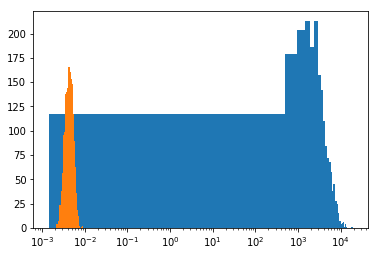

In [10]:
plt.xscale('log')
plt.hist(anomalous_test_losses_artificial_hot_towers,bins=40)
plt.hist(anomalous_test_losses_natural,bins=40)
plt.show()




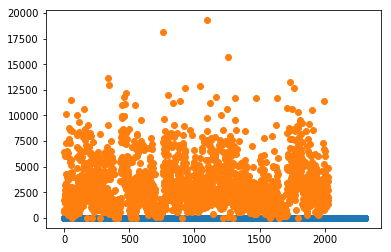

In [11]:
plt.scatter(range(len(anomalous_test_losses_natural)),anomalous_test_losses_natural)
plt.scatter(range(len(anomalous_test_losses_artificial_hot_towers)),anomalous_test_losses_artificial_hot_towers)
plt.show()

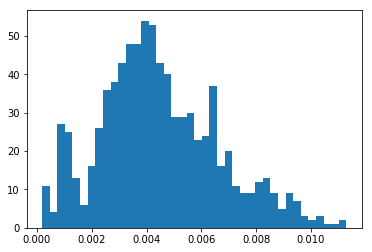

In [12]:
plt.hist(anomalous_test_losses_artificial_missing_modules,bins=40)
plt.show()

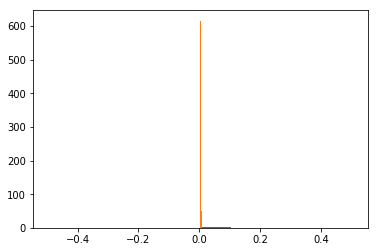

In [13]:

plt.hist([0.0036309000570327044])
plt.hist(anomalous_test_losses_natural)
plt.show()

In [14]:
y_true_good=[0 for i in range(len(anomalous_test_losses_natural)) ]
y_true_bad=[1 for i in range(len(anomalous_test_losses_artificial_hot_towers))]

y_true=y_true_good+y_true_bad
y_scores=anomalous_test_losses_natural+anomalous_test_losses_artificial_hot_towers

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true,y_scores)
print(fpr)
print(tpr)
print(thresholds)
auc=metrics.roc_auc_score(y_true,y_scores)

[  0.00000000e+00   0.00000000e+00   4.32713111e-04   4.32713111e-04
   1.81739507e-02   1.81739507e-02   1.13370835e-01   1.13370835e-01
   1.20726958e-01   1.20726958e-01   2.94677629e-01   2.94677629e-01
   3.89009087e-01   3.89009087e-01   5.07572479e-01   5.07572479e-01
   8.02250108e-01   8.02250108e-01   9.48939853e-01   9.48939853e-01
   1.00000000e+00   1.00000000e+00]
[  4.93339911e-04   9.95066601e-01   9.95066601e-01   9.95559941e-01
   9.95559941e-01   9.96053281e-01   9.96053281e-01   9.96546621e-01
   9.96546621e-01   9.97039961e-01   9.97039961e-01   9.97533300e-01
   9.97533300e-01   9.98026640e-01   9.98026640e-01   9.98519980e-01
   9.98519980e-01   9.99013320e-01   9.99013320e-01   9.99506660e-01
   9.99506660e-01   1.00000000e+00]
[  1.92951426e+04   1.10214967e-02   9.75781213e-03   9.61514749e-03
   6.94162399e-03   6.94104563e-03   5.89288212e-03   5.89006022e-03
   5.84887387e-03   5.84806409e-03   5.13174711e-03   5.13054989e-03
   4.87307832e-03   4.87161847e

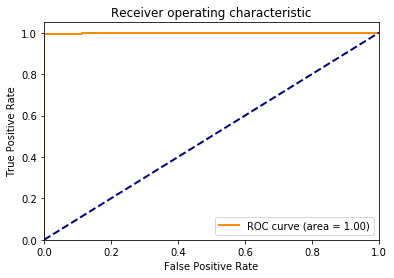

In [15]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
y_true_good=[0 for i in range(len(anomalous_test_losses_natural)) ]
y_true_bad=[1 for i in range(len(anomalous_test_losses_artificial_missing_modules))]

y_true=y_true_good+y_true_bad
y_scores=anomalous_test_losses_natural+anomalous_test_losses_artificial_missing_modules


from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true,y_scores)
print(metrics.roc_auc_score(y_true,y_scores))

0.444723879804


In [17]:
a=np.array([[[13,12],[11,10]],[[14,15],[16,17]]])
print(np.amax(a))
print(a/5)
print(a.shape)


NameError: name 'np' is not defined